# **Capstone Project AIML Great Learning**

---

**AUTOMATIC TICKET ASSIGNMENT**

In the support process, incoming incidents are analyzed and assessed by organization’s support teams to fulfill the request. In many organizations, better allocation and effective usage of the valuable support resources will directly result in substantial cost savings. Currently the incidents are created by various stakeholders and are assigned to Service Desk teams (L1 / L2 teams). Incase L1 / L2 is unable to resolve, L3 teams will carry out detailed diagnosis and resolve the incidents. During the process of incident assignments by L1 / L2 teams to functional groups, there were multiple instances of incidents getting assigned to wrong functional groups.Around ~25% of Incidents are wrongly assigned to functional teams. Additional effort needed for Functional teams to re-assign to right functional groups. During this process, some of the incidents are in queue and not addressed timely resulting in poor customer service.

**Objective**

In this capstone project, the goal is to build a classifier that can classify the tickets by analyzing text.

**Dataset**

File name : input_data.xlsx

Details about the data and dataset files are given in below link, https://drive.google.com/open?id=1OZNJm81JXucV3HmZroMq6qCT2m7ez7IJ


### Mount Google drive

In [1]:
# Mounting the drive for the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import spacy
from spacy.lang.en.stop_words import STOP_WORDS

from bs4 import BeautifulSoup
import unicodedata
import string
import nltk
import re
import spacy
from dateutil import parser

from io import StringIO
import csv

from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

import  numpy, textblob, string

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from tensorflow.keras.preprocessing.text import Tokenizer
import tensorflow as tf

# For model saving using keras.
from keras.models import load_model

PART 1 - <br> Pre-Processing, Data Visualization and EDA

---

* Exploring the given Data files <br>
* Understanding the structure of data <br>
* Missing points in data <br>
* Finding inconsistency <br>
* Visualizing different patterns  <br>
* Visualizing different text features <br>
* Dealing with missing values <br>
* Text preprocessing  <br>
* Creating word vocabulary from the corpus of report text data <br>
* Creating tokens as required <br>

**Loading Dataset**


In [3]:
 project_path="/content/drive/MyDrive/Colab Notebooks/Capstone/"
 df=pd.read_excel(project_path +'input_data.xlsx')

In [4]:
#df = pd.read_excel('/content/input_data.xlsx')

**View First 5 records of Dataset**

In [5]:
df.head()

Short description  ... Assignment group
0                    login issue  ...            GRP_0
1                        outlook  ...            GRP_0
2             cant log in to vpn  ...            GRP_0
3  unable to access hr_tool page  ...            GRP_0
4                   skype error   ...            GRP_0

[5 rows x 4 columns]

Inference:Assignment Group is the target column having multiple categories.
Its a multi-label class problem.


**Information about data.i.e datatypes,number of records,column names**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


**Column names in Dataset**

In [7]:
df.keys()

Index(['Short description', 'Description', 'Caller', 'Assignment group'], dtype='object')

**Shape of the Data**

In [8]:
df.shape

(8500, 4)

**Unique Groups**

In [9]:
df["Assignment group"].nunique()

74

In [10]:
df['Assignment group'].unique()

array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'GRP_35', 'GRP_36', 'GRP_37', 'GRP_38',
       'GRP_39', 'GRP_40', 'GRP_41', 'GRP_42', 'GRP_43', 'GRP_44',
       'GRP_45', 'GRP_46', 'GRP_47', 'GRP_48', 'GRP_49', 'GRP_50',
       'GRP_51', 'GRP_52', 'GRP_53', 'GRP_54', 'GRP_55', 'GRP_56',
       'GRP_57', 'GRP_58', 'GRP_59', 'GRP_60', 'GRP_61', 'GRP_32',
       'GRP_62', 'GRP_63', 'GRP_64', 'GRP_65', 'GRP_66', 'GRP_67',
       'GRP_68', 'GRP_69', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73'],
      dtype=object)

**Unique,Top,Freq Records**

In [11]:
df.describe()

Short description Description             Caller Assignment group
count               8492        8499               8500             8500
unique              7481        7817               2950               74
top       password reset         the  bpctwhsn kzqsbmtp            GRP_0
freq                  38          56                810             3976

1. Dataset has 8500 rows and 4 columns :  Short Description, Description, Caller , Assignment Group.
2. Datatype of all columns are "Object" type.
3. Most frequently raised incidents are related to  "password reset".
4. Most frequent Caller is "bpctwhsn kzqsbmtp".
5. Most incidents are raised under "GRP_0"
5. Target or Dependent column is "Assignment Group", which has 74 Functional Groups.

**Finding Missing values - NULL ,NaN values**

In [12]:
df.isnull().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

**Finding Duplicate values**

In [13]:
df.duplicated().sum()

83



1.   Data set is having 8 records with null value in short description

2.   Data set is having 1 records with null value in  description
3.   Dataset is having 83 duplicate record.

The approach used to clean data is by dropping records as in below steps as it wont have any meaning ful information



**Dealing with Missing and Duplicate value**

In [14]:
#Creating copy of original dataset

df_copy = df.copy(deep=True)
df_copy.dropna(inplace=True)
df_copy.drop_duplicates(inplace=True)

**Checking again for missing values and Duplicate values**

In [15]:
df_copy.isnull().sum()

Short description    0
Description          0
Caller               0
Assignment group     0
dtype: int64

In [16]:
df_copy.duplicated().sum()

0

**Visualizing different patterns**




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


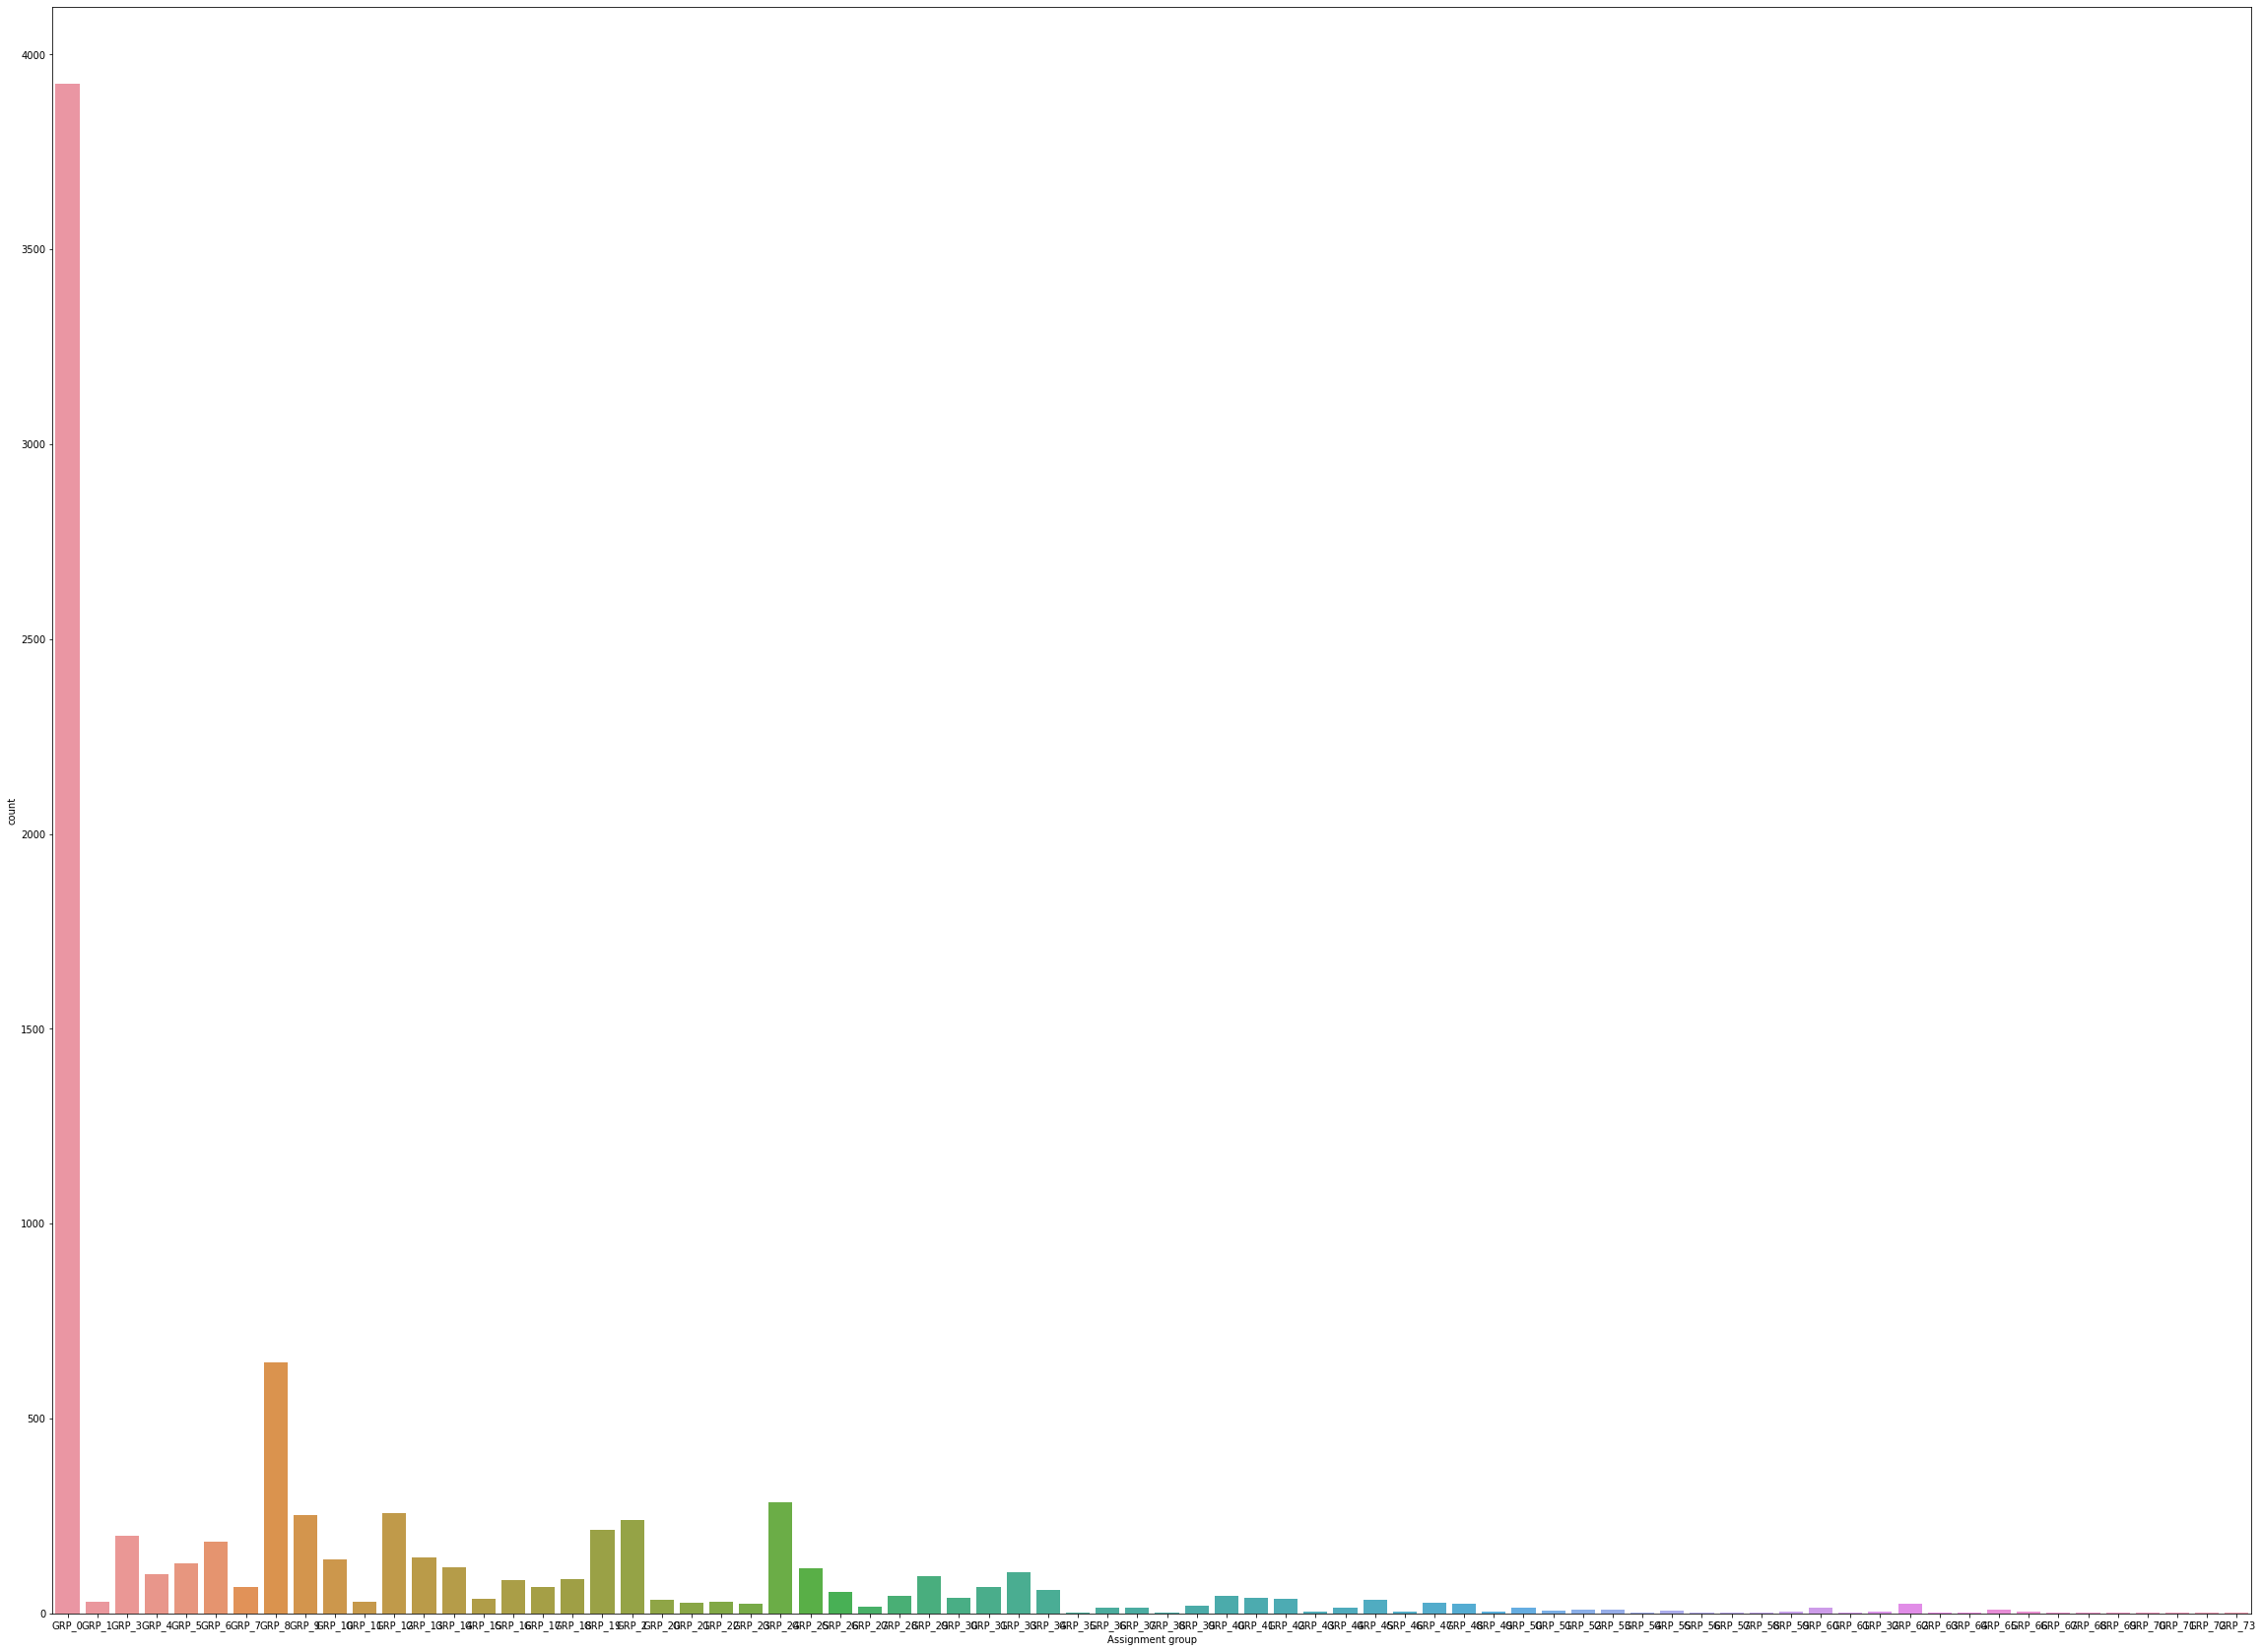

In [17]:
plt.figure(figsize=(40,30))
sns.countplot(df_copy['Assignment group']);

Data is skewed towards right.

Group0 has highest no. of incidents. 

Also, we can see that many group has count=1.

We can merge such groups which has less count to one group.

**Merging Classes**

In [18]:
def merge_classes(df_copy):
    assign_group = df_copy.groupby(['Assignment group']).size().reset_index(name='count')
    df_copy_count25 = assign_group[assign_group['count']<25]
    for i in df_copy_count25['Assignment group']:
        df_copy['Assignment group'] = data['Assignment group'].replace(i,'GRP_MISC')

In [19]:
df_copy['Assignment group'].nunique()

74

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


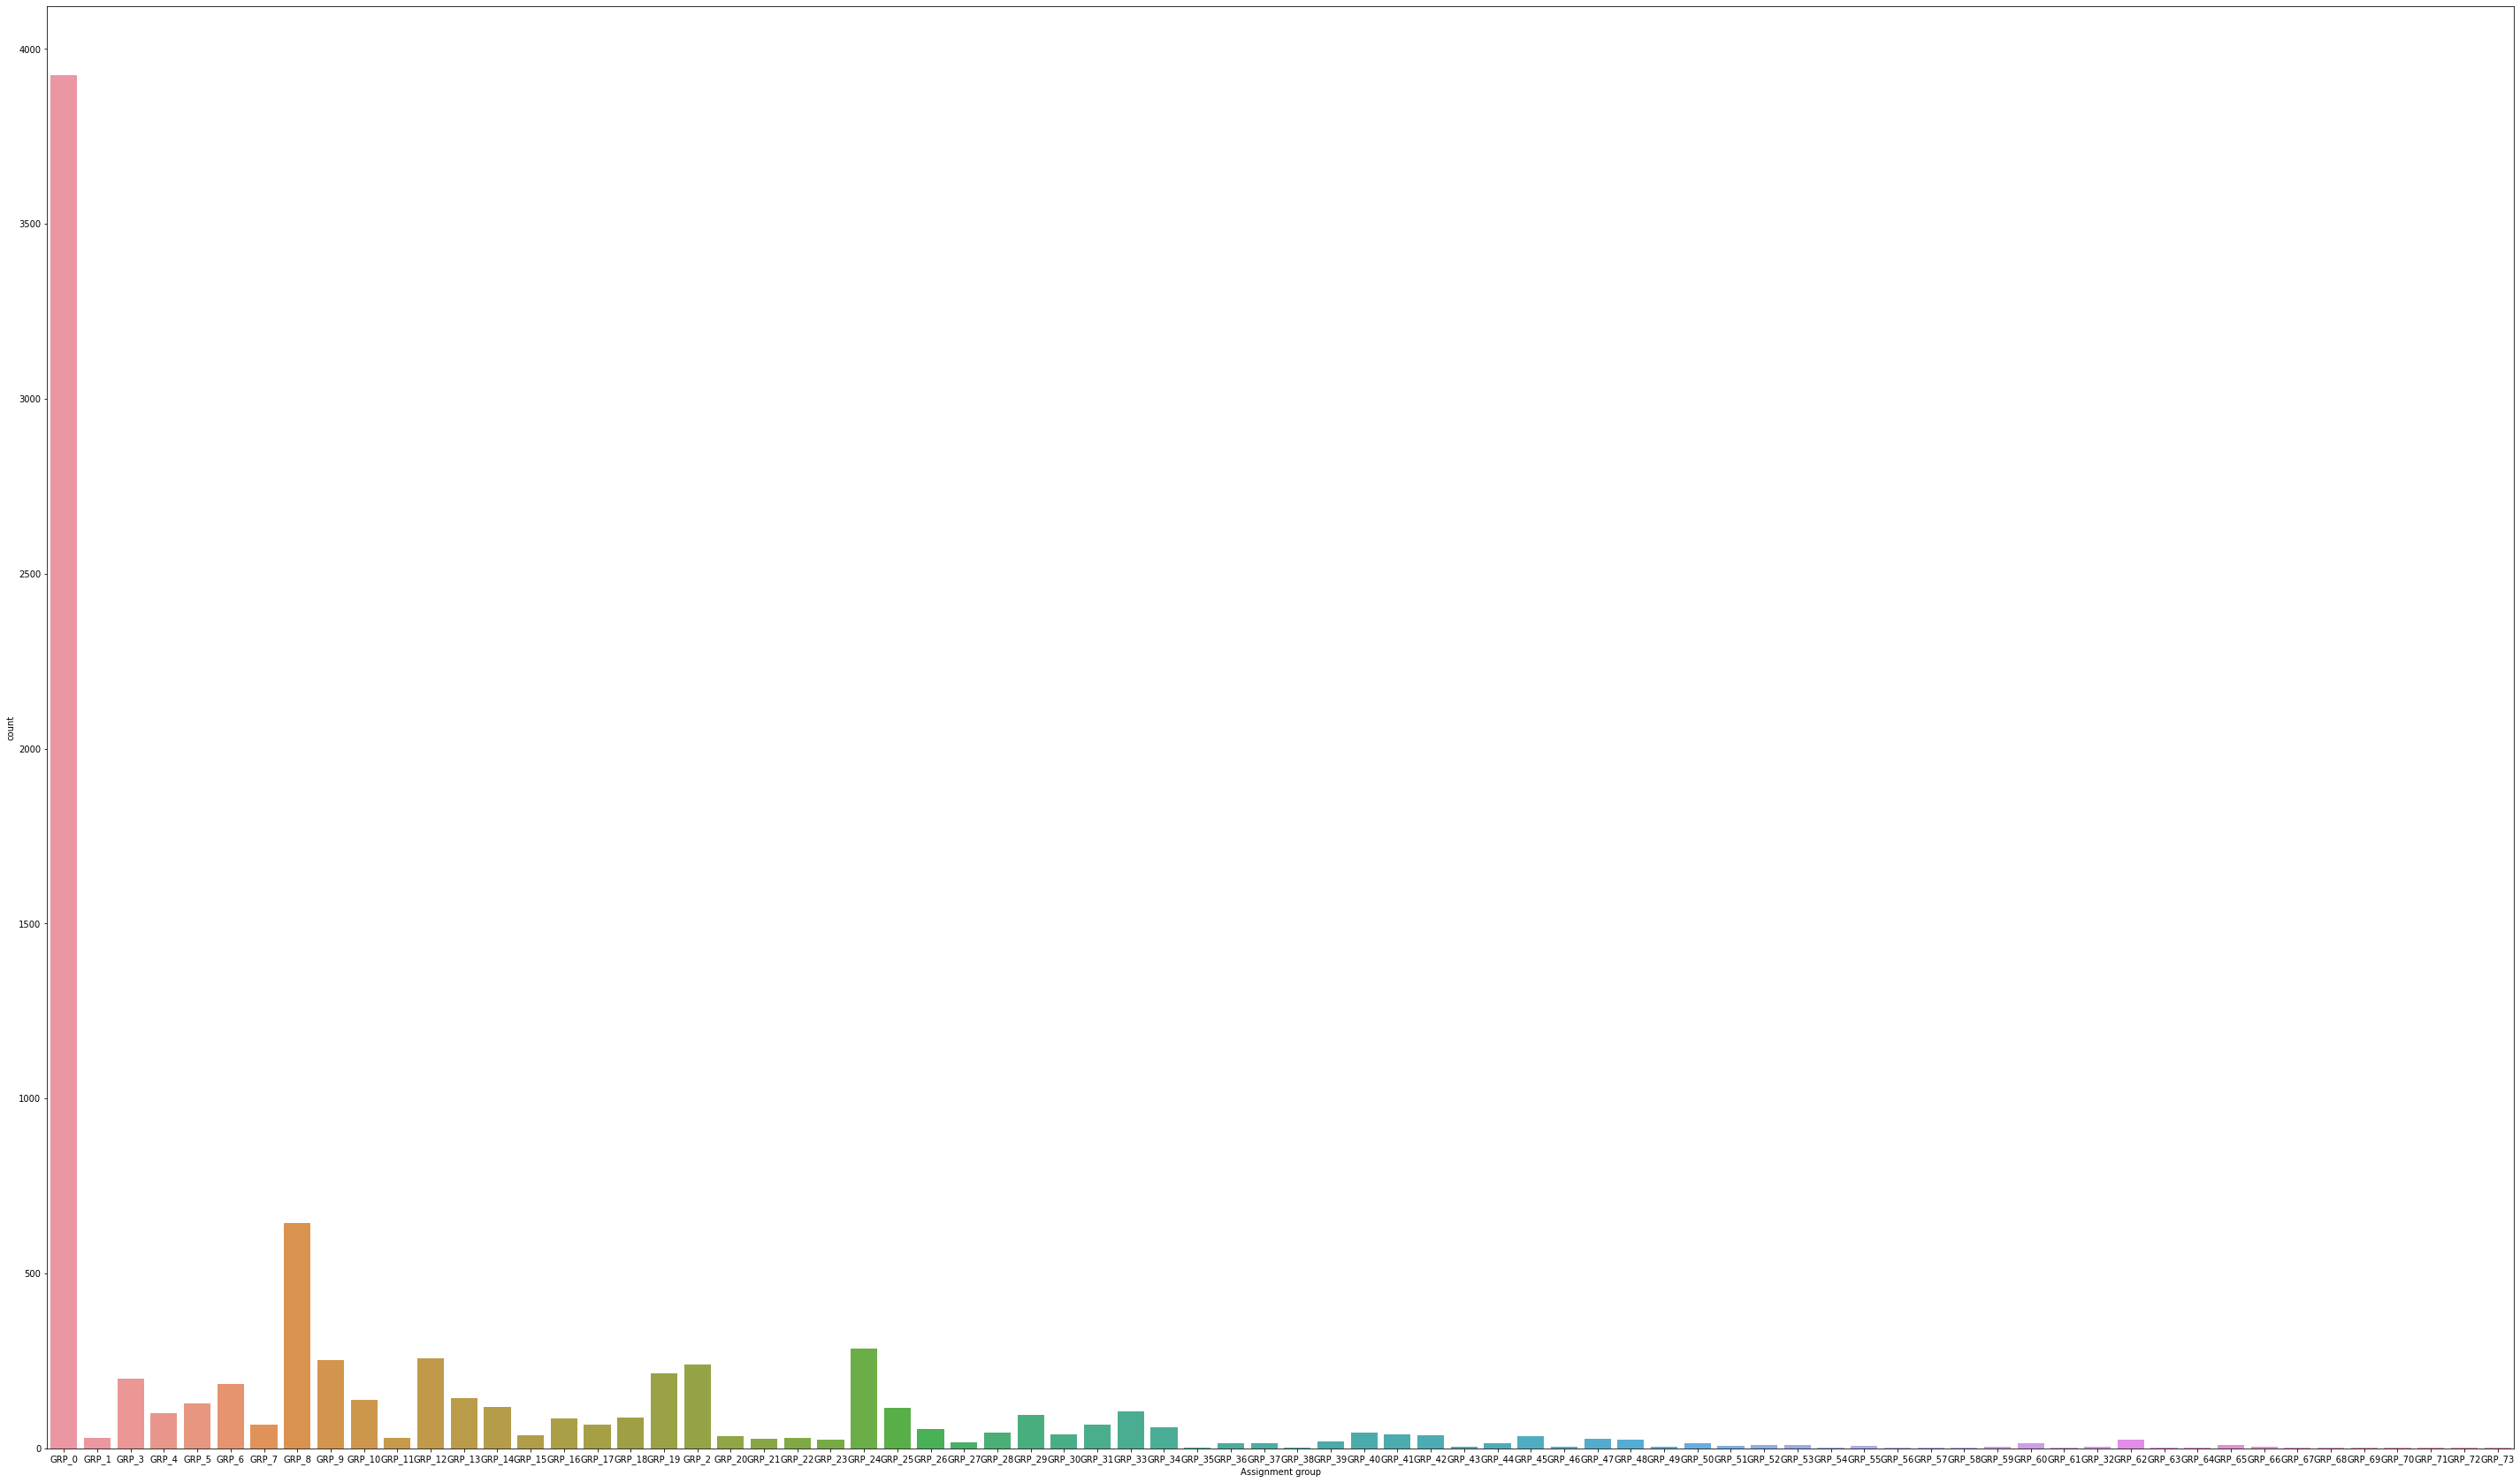

In [20]:
#Visualizing target column
plt.figure(figsize=(50,30))
sns.countplot(df_copy['Assignment group']);

After mergering Groups which has less count into another group "GRP_MISC", countplot looks more clear now.

In [21]:
df_copy.head()

Short description  ... Assignment group
0                    login issue  ...            GRP_0
1                        outlook  ...            GRP_0
2             cant log in to vpn  ...            GRP_0
3  unable to access hr_tool page  ...            GRP_0
4                   skype error   ...            GRP_0

[5 rows x 4 columns]

**Merging Short Description and Description**

In [22]:
# Merging Short Desc and Description

df_copy["Combined Description"] = df_copy["Short description"] + ' ' + df_copy["Description"]

In [23]:
df_copy.head()

Short description  ...                               Combined Description
0                    login issue  ...  login issue -verified user details.(employee# ...
1                        outlook  ...  outlook \r\n\r\nreceived from: hmjdrvpb.komuay...
2             cant log in to vpn  ...  cant log in to vpn \r\n\r\nreceived from: eylq...
3  unable to access hr_tool page  ...  unable to access hr_tool page unable to access...
4                   skype error   ...                          skype error  skype error 

[5 rows x 5 columns]

**Grouping Assignment Group Column**

In [24]:
df_grp=df_copy.groupby(['Assignment group']).size().reset_index(name='counts')

**Top 20 Groups**

In [25]:
df_grp.sort_values(by='counts',ascending=False)[:20]

Assignment group  counts
0             GRP_0    3926
72            GRP_8     645
17           GRP_24     285
4            GRP_12     257
73            GRP_9     252
12            GRP_2     241
11           GRP_19     215
23            GRP_3     200
56            GRP_6     183
5            GRP_13     145
2            GRP_10     140
45            GRP_5     128
6            GRP_14     118
18           GRP_25     116
27           GRP_33     107
34            GRP_4     100
22           GRP_29      97
10           GRP_18      88
8            GRP_16      85
25           GRP_31      69

**Bottom 20 groups**

In [26]:
df_grp.sort_values(by='counts',ascending=False)[-20:]

Assignment group  counts
41           GRP_46       6
38           GRP_43       5
63           GRP_66       4
26           GRP_32       4
32           GRP_38       3
65           GRP_68       3
60           GRP_63       3
54           GRP_58       3
52           GRP_56       3
53           GRP_57       2
66           GRP_69       2
69           GRP_71       2
70           GRP_72       2
50           GRP_54       2
61           GRP_64       1
58           GRP_61       1
64           GRP_67       1
29           GRP_35       1
68           GRP_70       1
71           GRP_73       1

**Groups With Count<50**

In [27]:
df_grp_CountLessThan50 = df_grp[df_grp['counts']<50]

In [28]:
df_grp_CountLessThan50

Assignment group  counts
1             GRP_1      31
3            GRP_11      30
7            GRP_15      38
13           GRP_20      36
14           GRP_21      28
15           GRP_22      31
16           GRP_23      25
20           GRP_27      18
21           GRP_28      44
24           GRP_30      39
26           GRP_32       4
29           GRP_35       1
30           GRP_36      15
31           GRP_37      16
32           GRP_38       3
33           GRP_39      19
35           GRP_40      45
36           GRP_41      40
37           GRP_42      37
38           GRP_43       5
39           GRP_44      15
40           GRP_45      35
41           GRP_46       6
42           GRP_47      27
43           GRP_48      25
44           GRP_49       6
46           GRP_50      14
47           GRP_51       8
48           GRP_52       9
49           GRP_53      11
50           GRP_54       2
51           GRP_55       8
52           GRP_56       3
53           GRP_57       2
54           GRP_58       3
55           GRP_59       6
57           GRP_60      16
58           GRP_61       1
59           GRP_62      25
60           GRP_63       3
61           GRP_64       1
62           GRP_65      11
63           GRP_66       4
64           GRP_67       1
65           GRP_68       3
66           GRP_69       2
68           GRP_70       1
69           GRP_71       2
70           GRP_72       2
71           GRP_73       1

In [29]:
df_grp_CountLessThan50.shape

(50, 2)

**Plotting Group Ticket Assignment freq**

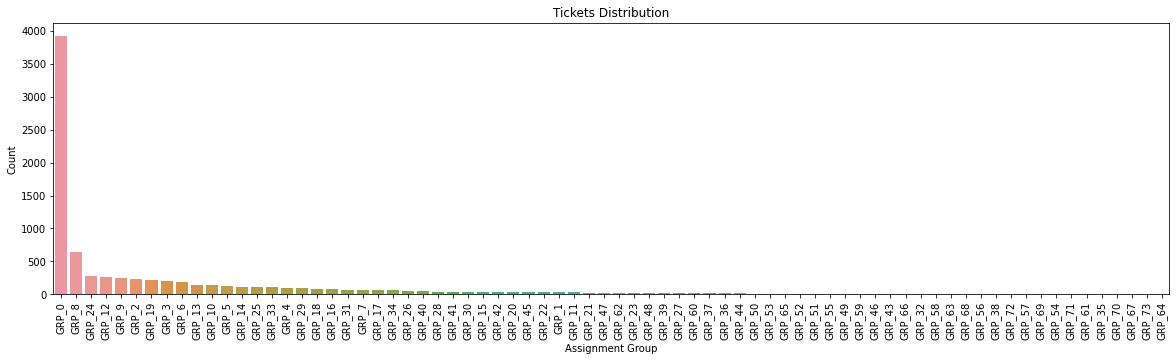

In [30]:
plt.subplots(figsize = (20,5))

sns.countplot(x='Assignment group', data=df_copy,order = df_copy['Assignment group'].value_counts().index)
plt.xlabel('Assignment Group') 
plt.ylabel('Count') 
plt.xticks(rotation=90)
plt.title('Tickets Distribution')

plt.show()

Inference:¶
From the above two plots the Data is skewed towards right.
The 'Group 0' has highest no. of incidents.
We can also view that many group having count=1.

In [31]:
df_grp.describe()

counts
count    74.000000
mean    113.621622
std     459.823990
min       1.000000
25%       5.250000
50%      26.000000
75%      81.000000
max    3926.000000

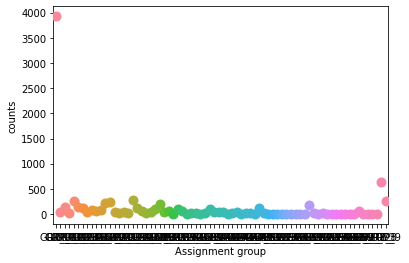

In [32]:
sns.swarmplot(x=df_grp['Assignment group'], y=df_grp['counts'], data=df_grp,size=10)

In [33]:
# Distribution of ticket counts in various bins

df_inc = df_copy['Assignment group'].value_counts().reset_index()
df_inc['percentage'] = (df_inc['Assignment group']/df_inc['Assignment group'].sum())*100
df_inc.head()

df_bins = pd.DataFrame(columns=['Description','Ticket Count'])
one_ticket = {'Description':'1 ticket','Ticket Count':len(df_inc[df_inc['Assignment group'] < 2])}
_2_5_ticket = {'Description':'2-5 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 1)& (df_inc['Assignment group'] < 6) ])}
_10_ticket = {'Description':' 6-10 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 5)& (df_inc['Assignment group'] < 11)])}
_10_20_ticket = {'Description':' 11-20 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 10)& (df_inc['Assignment group'] < 21)])}
_20_50_ticket = {'Description':' 21-50 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 20)& (df_inc['Assignment group'] < 51)])}
_51_100_ticket = {'Description':' 51-100 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 50)& (df_inc['Assignment group'] < 101)])}
_100_ticket = {'Description':' >100 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 100)])}
#append row to the dataframe
df_bins = df_bins.append([one_ticket,_2_5_ticket,_10_ticket,
                          _10_20_ticket,_20_50_ticket,_51_100_ticket,_100_ticket], ignore_index=True)

df_bins

Description Ticket Count
0        1 ticket            6
1      2-5 ticket           13
2     6-10 ticket            6
3    11-20 ticket            9
4    21-50 ticket           16
5   51-100 ticket            9
6     >100 ticket           15

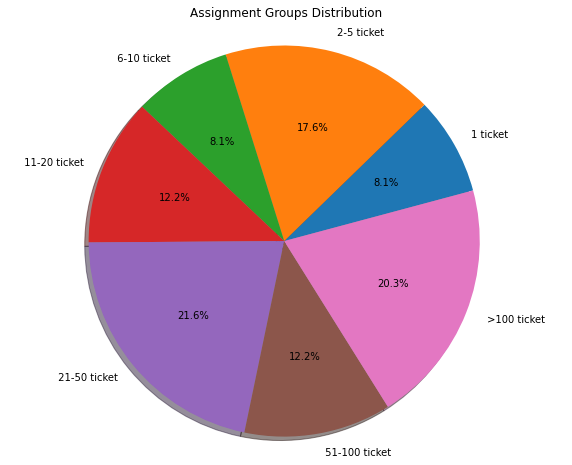

In [34]:
plt.figure(figsize=(10, 8))
plt.pie(df_bins['Ticket Count'],labels=df_bins['Description'],autopct='%1.1f%%', startangle=15, shadow = True);
plt.title('Assignment Groups Distribution')
plt.axis('equal');

**Word Count In Data Set**

In [35]:
df_copy['word_counts']=df_copy['Combined Description'].apply(lambda x :len(str(x).split()))

**Char Count**

In [36]:
df_copy['char counts']=df_copy['Combined Description'].apply(lambda x : len(x))

In [37]:
df_copy.head()

Short description  ... char counts
0                    login issue  ...         218
1                        outlook  ...         202
2             cant log in to vpn  ...         106
3  unable to access hr_tool page  ...          59
4                   skype error   ...          25

[5 rows x 7 columns]

**Stop Words**

In [38]:
print(STOP_WORDS)

{'then', 'sometimes', 'first', 'why', 'formerly', 'thus', 'see', '‘ve', 'ca', 'against', 'through', 'even', 'much', 'somewhere', '‘ll', 'whatever', 'he', 'often', 'whenever', 'whole', 'seeming', 'where', 'indeed', 'she', 'meanwhile', 'full', 'per', 'else', 'latterly', 'their', 'made', 'unless', 'without', 'forty', 'all', 'seems', 'such', 'when', 'really', 'whoever', 'may', 'n’t', 'hereby', 'thru', 'still', 'him', 'perhaps', '‘s', 'that', 'yet', 'anywhere', 'used', 'too', 'wherever', 'everything', 'within', 'six', 'whom', 'nothing', 'however', 'please', 'few', 'my', 'must', 'onto', 'them', 'sixty', 'mine', 'but', "'ve", 'be', 'during', 'back', 'hereupon', 'nowhere', 'in', 'various', 'this', 'might', 'these', 'eight', 'did', 'more', 'so', 'whereby', 'besides', 'an', 'hers', 'sometime', "'d", 'though', 'front', 'part', 'i', 'along', 'thence', 'bottom', '‘re', 'themselves', 'using', 'ten', 'fifty', 'myself', 'quite', 'his', 'no', 'after', 'for', 'while', 'third', 'namely', 'out', 'keep', '

In [39]:
df_copy['stop_words_len']=df_copy['Combined Description'].apply(lambda x : len([t for t in x.split() if t in STOP_WORDS]))

In [40]:
df_copy.head(5)

Short description  ... stop_words_len
0                    login issue  ...             12
1                        outlook  ...              9
2             cant log in to vpn  ...              6
3  unable to access hr_tool page  ...              2
4                   skype error   ...              0

[5 rows x 8 columns]

In [41]:
df_copy['stop_words']=df_copy['Combined Description'].apply(lambda x : [t for t in x.split() if t in STOP_WORDS])

In [42]:
df_copy.head()

Short description  ...                                         stop_words
0                    login issue  ...  [the, name, in, and, the, the, to, and, that, ...
1                        outlook  ...       [my, are, not, in, my, can, please, how, to]
2             cant log in to vpn  ...                        [in, to, i, cannot, on, to]
3  unable to access hr_tool page  ...                                           [to, to]
4                   skype error   ...                                                 []

[5 rows x 9 columns]

**Word cloud before Text Preprocessing and Data Cleaning**

In [43]:
def create_wordcloud(data):
  s = ""
  text = s.join(data.to_string())

# Create the wordcloud object
  wordcloud = WordCloud(width = 300, height = 400,min_font_size = 5,background_color="white", max_words=1000).generate(text)
  return wordcloud

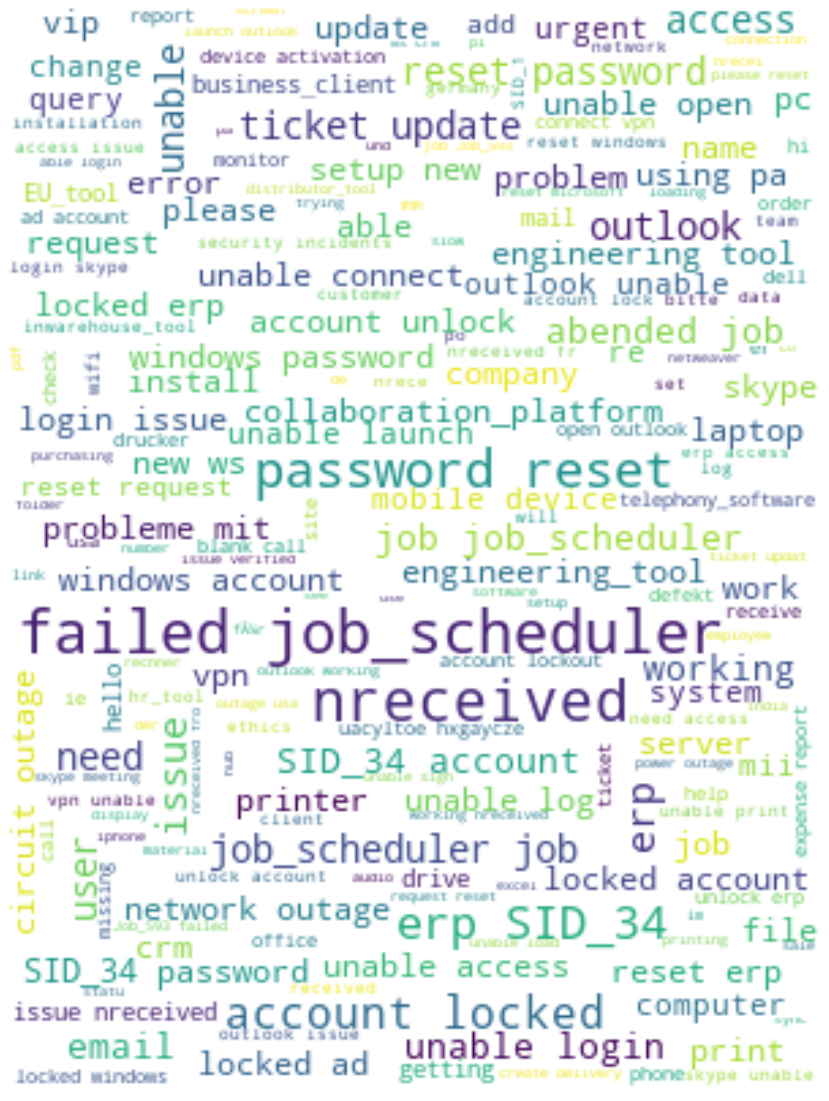

In [44]:
from wordcloud import WordCloud

wordcloud = create_wordcloud(df_copy['Combined Description'])

#Display wordclod
plt.figure(figsize=(20,20))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

Looking at Word Cloud , we can failed job_scheduler, password reset , unable to login , account locked as the most frequent incident types.

**Vistualizing ticket type for GRP_0**

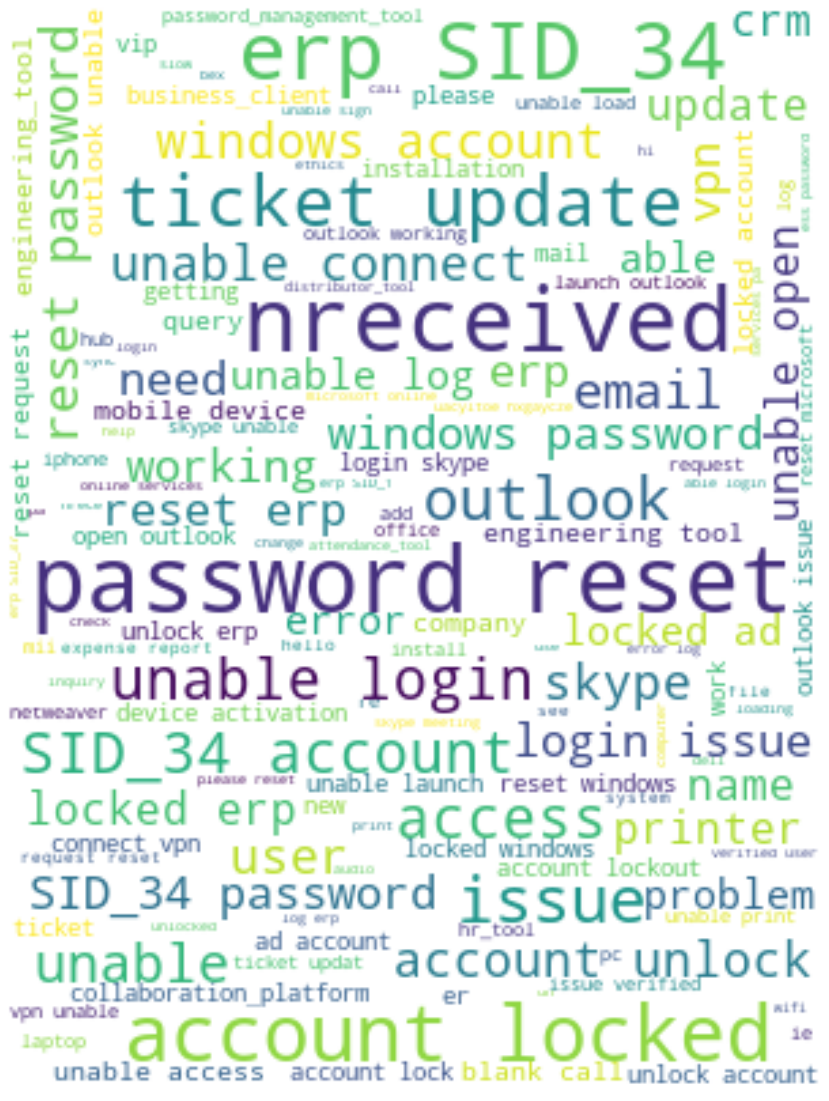

In [45]:
wordcloud = create_wordcloud(df_copy[df_copy['Assignment group']=='GRP_0']['Combined Description'])

#Display wordclod
plt.figure(figsize=(20,20))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In GRP_0, we can observe that "password reset" , "ticket update" , "account locked" are most frequently raised incident.

**visualing wordcloud for group 10** 

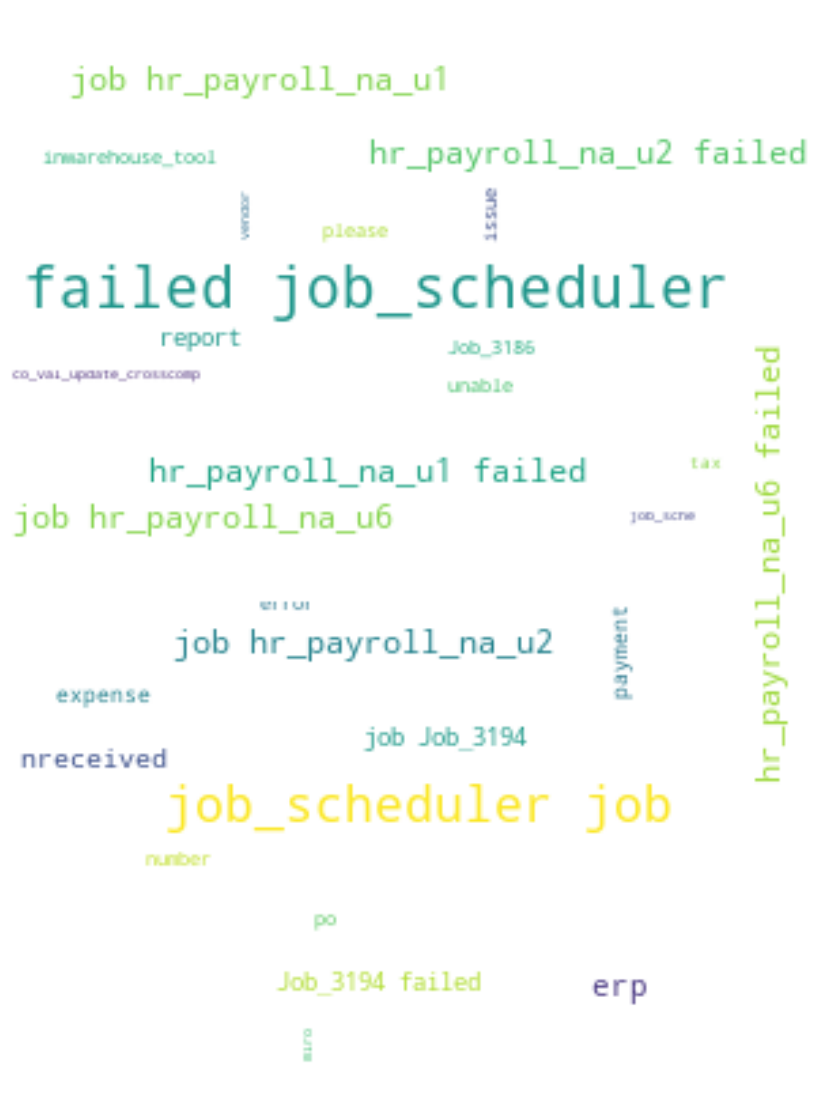

In [46]:
wordcloud = create_wordcloud(df_copy[df_copy['Assignment group']=='GRP_10']['Combined Description'])

#Display wordclod
plt.figure(figsize=(20,20))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

### Text Preprocessing

In [47]:
PUNCT_TO_REMOVE = string.punctuation
PUNCT_TO_REMOVE

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [48]:
def is_valid_date(date_str):
    try:
        parser.parse(date_str)
        return True
    except:
        return False

callers = df_copy['Caller'].unique()
 

def data_clean_up(text):
  # Remove html tags
  text=BeautifulSoup(text,'html.parser').get_text()
  # Remove Accented text
  text=unicodedata.normalize('NFKD',text).encode('ascii','ignore').decode('utf-8','ignore')

  #Remove punctuation
  text = text.translate(str.maketrans('','',PUNCT_TO_REMOVE))

# Removing special chars
  pat=r'[^A-Za-z0-9.,!?/:;\"\'\s]'
  text=re.sub(pat,' ',text)
# Remove punctuations
  text=''.join([t for t in text if t not in string.punctuation])

  text = ' '.join([w for w in text.split() if not is_valid_date(w)])
  text = re.sub(r"received from:",' ',text)
  text = re.sub(r"from:",' ',text)
  text = re.sub(r"to:",' ',text)
  text = re.sub(r"subject:",' ',text)
  text = re.sub(r"sent:",' ',text)
  text = re.sub(r"ic:",' ',text)
  text = re.sub(r"cc:",' ',text)
  text = re.sub(r"bcc:",' ',text)  
  text= re.sub(r"bcc:",' ',text)
  text = re.sub(r"gmail",' ',text)
  text = re.sub(r"hello",' ',text)
  text = re.sub(r"hi",' ',text)
  text = re.sub(r"and",' ',text)
  text = re.sub(r"company",' ',text)
  text = re.sub(r"yes",' ',text)
  text = re.sub(r"no",' ',text)
  text = re.sub(r"please",' ',text)
  text = re.sub(r"image",' ',text)
  text = re.sub(r"png",' ',text)
  text = re.sub(r"outlook",' ',text)
  text = re.sub(r"sid",' ',text)
  text = re.sub(r"cid",' ',text)
  text = re.sub(r"resolved",' ',text)

# Stemming
  # stemmer=nltk.porter.PorterStemmer()
  # text=' '.join([stemmer.stem(word) for word in text.split()])


# Lemmatization
  # nlp=spacy.load('en',parse=True,tag=True,entity=True)
  # text=nlp(text)
  # text=' '.join([word.lemma_ if word.lemma_ !='-PRON-' else word.text for word in text])

# Remove extra white spaces
  text=re.sub('\s+',' ',text)

# Remove new line characters 
  text = re.sub(r'\n',' ',text)

# Lower case
  text=text.lower()

# Removing HTML tags
  cleanr = re.compile('<.*?>')
  text = re.sub(cleanr, ' ',text)
# Remove Email Id
  text = re.sub(r'\S*@\S*\s?', '', text)
  
 # Remove characters beyond Readable formart by Unicode:
  text= ''.join(c for c in text if c <= '\uFFFF') 
  text = text.strip()
  # Remove numbers
  text = re.sub(r'\d+','' ,text)

# Remove hyperlinks
  text = re.sub(r'https?:\/\/.*\/\w*', '', text) 

# Remove characters beyond Readable formart by Unicode:
  text= ''.join(c for c in text if c <= '\uFFFF') 
  text = text.strip()

# Remove unreadable characters  (also extra spaces)
  text = ' '.join(re.sub("[^\u0030-\u0039\u0041-\u005a\u0061-\u007a]", " ", text).split())
  for name in callers:
    namelist = [part for part in name.split()]
    for namepart in namelist:
      text = text.replace(namepart,'')

  return text

In [49]:
df_copy['Combined Description'][0]

'login issue -verified user details.(employee# & manager name)\r\n-checked the user name in ad and reset the password.\r\n-advised the user to login and check.\r\n-caller confirmed that he was able to login.\r\n-issue resolved.'

In [50]:
df_copy['Combined Description']= df_copy['Combined Description'].apply(data_clean_up)

In [51]:
df_copy['Combined Description'][0]

'login issue verified user detailsemployee manager name checked the user name in ad reset the password advised the user to login check caller confirmed that he was able to login issue'

**Language Detection**


In [52]:
!pip install langdetect 
from langdetect import detect
df_copy['language'] = df_copy['Combined Description'].apply(detect)

In [53]:
df_copy.head()

Short description  ... language
0                    login issue  ...       en
1                        outlook  ...       en
2             cant log in to vpn  ...       en
3  unable to access hr_tool page  ...       it
4                   skype error   ...       no

[5 rows x 10 columns]

In [54]:
df_copy['language'].nunique()

29

In [55]:
df_copy['language'].unique()

array(['en', 'it', 'no', 'fr', 'es', 'af', 'sv', 'nl', 'ca', 'tl', 'id',
       'fi', 'de', 'ro', 'cy', 'pl', 'da', 'so', 'pt', 'sw', 'et', 'hu',
       'sl', 'cs', 'sk', 'lv', 'lt', 'hr', 'tr'], dtype=object)

In [56]:
df_copy[['language','Combined Description']]

language                               Combined Description
0          en  login issue verified user detailsemployee mana...
1          en  received from  com team my meetingsskype meeti...
2          en  cant log in to vpn received from  com i can t ...
3          it  unable to access hrtool page unable to access ...
4          no                            skype error skype error
...       ...                                                ...
8495       en  emails t coming in from zz mail received from ...
8496       en    telephonysoftware issue telephonysoftware issue
8497       en  vip windows password reset for tifpdchb pedxru...
8498       en  mac ne nao esta funcion o i am unable to acces...
8499       de  an mehreren pcs lassen sich versc edene prgram...

[8408 rows x 2 columns]

In [57]:
df_copy.groupby(['language']).size().reset_index(name='Language Counts').sort_values(by='Language Counts',ascending=False)

language  Language Counts
6        en             6876
5        de              392
0        af              271
14       it              160
10       fr              138
7        es               99
18       no               82
17       nl               72
25       sv               64
21       ro               51
1        ca               45
4        da               37
20       pt               32
27       tl               18
19       pl               16
24       so               10
3        cy                8
8        et                6
23       sl                6
11       hr                5
12       hu                4
13       id                4
9        fi                4
15       lt                2
26       sw                2
16       lv                1
22       sk                1
2        cs                1
28       tr                1

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


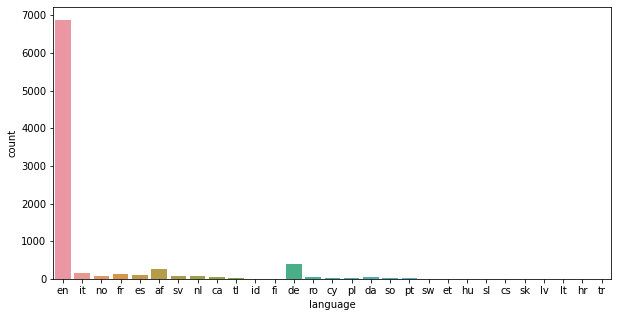

In [58]:
plt.figure(figsize=(10,5))
sns.countplot(df_copy['language']);

1. There are total 29 language detected in Dataset.
2. Most frequently used language in which incident is raised is "English".

**Language Translation**

In [59]:
!pip install -q googletrans
from googletrans import Translator

def translate_to_Eng(data,lang):
  try:
    if lang == 'en':
      return data
    else:
      return translator.translate(data).text
  except:
    return data

In [60]:
df_copy['Combined Description'] = df_copy.apply(lambda x: translate_to_Eng(x['Combined Description'], x['language']), axis=1)

In [61]:
df_copy.head()

Short description  ... language
0                    login issue  ...       en
1                        outlook  ...       en
2             cant log in to vpn  ...       en
3  unable to access hr_tool page  ...       it
4                   skype error   ...       no

[5 rows x 10 columns]

We have translated all the incident to English language, as it was the most frequently used language by customer.

**Removing Chat Words**

In [62]:
chat_words_str = """
AFAIK=As Far As I Know
AFK=Away From Keyboard
ASAP=As Soon As Possible
ATK=At The Keyboard
ATM=At The Moment
A3=Anytime, Anywhere, Anyplace
BAK=Back At Keyboard
BBL=Be Back Later
BBS=Be Back Soon
BFN=Bye For Now
B4N=Bye For Now
BRB=Be Right Back
BRT=Be Right There
BTW=By The Way
B4=Before
B4N=Bye For Now
CU=See You
CUL8R=See You Later
CYA=See You
FAQ=Frequently Asked Questions
FC=Fingers Crossed
FWIW=For What It's Worth
FYI=For Your Information
GAL=Get A Life
GG=Good Game
GN=Good Night
GMTA=Great Minds Think Alike
GR8=Great!
G9=Genius
IC=I See
ICQ=I Seek you (also a chat program)
ILU=ILU: I Love You
IMHO=In My Honest/Humble Opinion
IMO=In My Opinion
IOW=In Other Words
IRL=In Real Life
KISS=Keep It Simple, Stupid
LDR=Long Distance Relationship
LMAO=Laugh My A.. Off
LOL=Laughing Out Loud
LTNS=Long Time No See
L8R=Later
MTE=My Thoughts Exactly
M8=Mate
NRN=No Reply Necessary
OIC=Oh I See
PITA=Pain In The A..
PRT=Party
PRW=Parents Are Watching
ROFL=Rolling On The Floor Laughing
ROFLOL=Rolling On The Floor Laughing Out Loud
ROTFLMAO=Rolling On The Floor Laughing My A.. Off
SK8=Skate
STATS=Your sex and age
ASL=Age, Sex, Location
THX=Thank You
TTFN=Ta-Ta For Now!
TTYL=Talk To You Later
U=You
U2=You Too
U4E=Yours For Ever
WB=Welcome Back
WTF=What The F...
WTG=Way To Go!
WUF=Where Are You From?
W8=Wait...
7K=Sick:-D Laugher
"""

In [63]:
chat_words_map_dict = {}
chat_words_list = []
for line in chat_words_str.split("\n"):
    if line != "":
        cw = line.split("=")[0]
        cw_expanded = line.split("=")[1]
        chat_words_list.append(cw)
        chat_words_map_dict[cw] = cw_expanded
chat_words_list = set(chat_words_list)

def chat_words_conversion(text):
    new_text = []
    for w in text.split():
        if w.upper() in chat_words_list:
            new_text.append(chat_words_map_dict[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text)

# chat_words_conversion("one minute BRB")

In [64]:
df_copy['Combined Description']= df_copy['Combined Description'].apply(lambda x : chat_words_conversion(''.join(x)))

**Spell Checking**

In [65]:
!pip install pyspellchecker

In [66]:
from spellchecker import SpellChecker
spell = SpellChecker()

def correct_spellings(text):
    ct=0
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
            
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)

In [67]:
#df_copy['Combined Description']= df_copy['Combined Description'].apply(lambda x : correct_spellings(''.join(x)))


In [68]:
df.head()

Short description  ... Assignment group
0                    login issue  ...            GRP_0
1                        outlook  ...            GRP_0
2             cant log in to vpn  ...            GRP_0
3  unable to access hr_tool page  ...            GRP_0
4                   skype error   ...            GRP_0

[5 rows x 4 columns]

In [69]:
df_copy.head()

Short description  ... language
0                    login issue  ...       en
1                        outlook  ...       en
2             cant log in to vpn  ...       en
3  unable to access hr_tool page  ...       it
4                   skype error   ...       no

[5 rows x 10 columns]

**Lemmatization**

In [70]:
from nltk.corpus import stopwords
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger') 

# sr = stopwords.words('english')
# for i,text in enumerate(df_copy['English Description']):
#   df_copy['English Description'][i]=" ".join(word for word in text.split(' ') if word not in sr)

# install spacy and plt for gensim  
!pip install -q spacy 
import spacy
nlp = spacy.load('en', disable=['parser', 'ner'])
allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']

def lemmatize_text(text):
  doc = nlp(text)
  return ' '.join([token.lemma_ for token in doc])



df_copy['Combined Description'] = df_copy['Combined Description'].apply(lemmatize_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [71]:
df_copy['Combined Description'][0]

'login issue verify user detailsemployee manager name check the user name in ad reset the password advise the user to login check caller confirm that -PRON- be able to login issue'

In [72]:
df_copy['Combined Description']

0       login issue verify user detailsemployee manage...
1       receive from com team -PRON- meetingsskype mee...
2       can not log in to vpn receive from com i can t...
3       unable to access hrtool page unable to access ...
4                                 skype error skype error
                              ...                        
8495    email t come in from zz mail receive from com ...
8496      telephonysoftware issue telephonysoftware issue
8497    vip windows password reset for tifpdchb pedxru...
8498    mac ne nao esta funcion o i be unable to acces...
8499    an mehreren pcs lassen sich versc edene prgram...
Name: Combined Description, Length: 8408, dtype: object

1. We have cleaned data using **data_clean_up()** function and removed unnecesaary characters,link, punctuation marks, spaces etc.
2. Used **langdetect** library for detecting languages in dataset and foubd 29 languages.
3. Translated all languages to English using **googletrans** library, as it is frequently used language used by customer to raise incident.

4. Removed **STOPWORDS**
5. Removed **Chat words** from dataset, if there are any.
7. Corrected spellings using **pyspellchecker** library..
6. **Lemmatized** words so that to get meaningful words.

**Visualization using Wordcloud after Data cleaning and pre-processing**

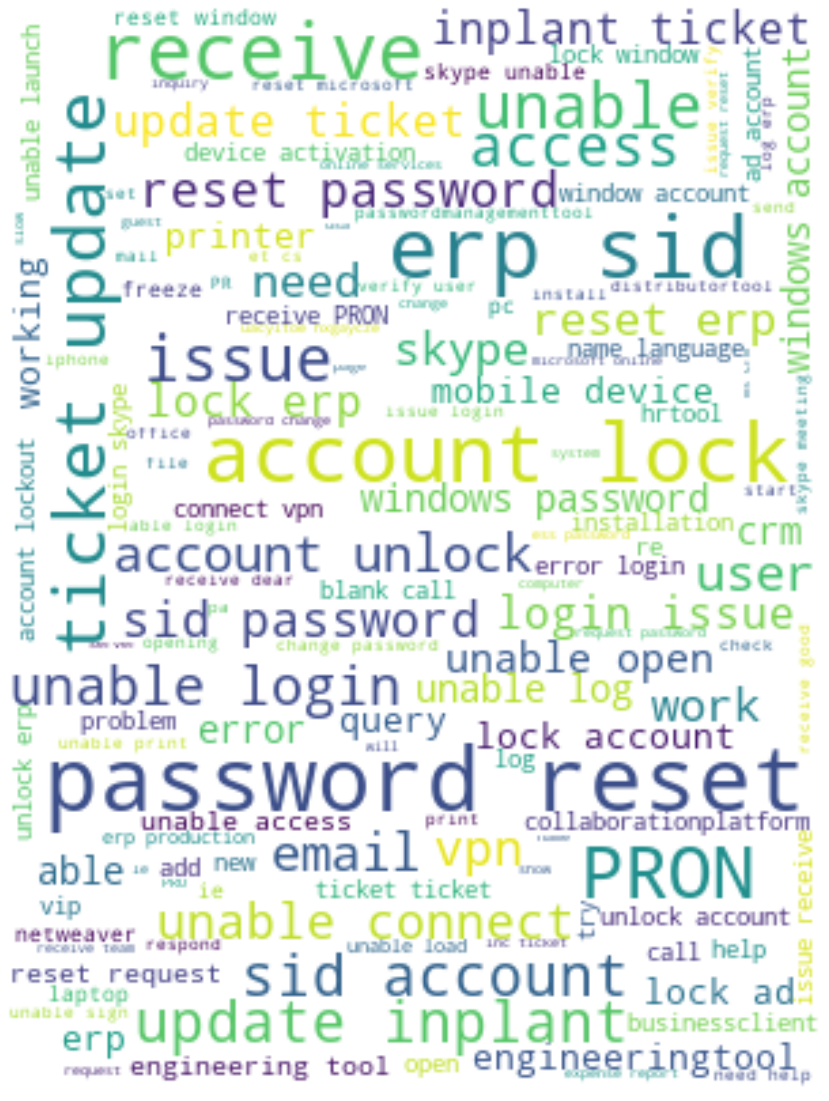

In [73]:
wordcloud = create_wordcloud(df_copy[df_copy['Assignment group']=='GRP_0']['Combined Description'])

#Display wordclod
plt.figure(figsize=(20,20))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

Now we can visualize data clearly after data cleaning and text preprocessing.

**Saving cleaned dataset to csv for future use**

In [74]:
df_copy.to_pickle('DataCleanedTranslated.pkl')

In [75]:
#Method-1 : Pickle the file and unpickle it and read data from it
Df_Cleaned_Translated_Data=pd.read_pickle('DataCleanedTranslated.pkl')
#dataAnalysis=dataAnalysis.transpose()
Df_Cleaned_Translated_Data.head()

Short description  ... language
0                    login issue  ...       en
1                        outlook  ...       en
2             cant log in to vpn  ...       en
3  unable to access hr_tool page  ...       it
4                   skype error   ...       no

[5 rows x 10 columns]

In [76]:
#Method-2 : Copy clean data to csv file, save it and load cleaned file
# df_copy.to_csv(project_path +'/CleanedDatasetTranslated.csv')

**Merging Combined Description With respect to Groups**

In [77]:
Df_Cleaned_Translated_Data.head()

Short description  ... language
0                    login issue  ...       en
1                        outlook  ...       en
2             cant log in to vpn  ...       en
3  unable to access hr_tool page  ...       it
4                   skype error   ...       no

[5 rows x 10 columns]

In [78]:
df_copy_Refined_Data = Df_Cleaned_Translated_Data.copy(deep= True)

In [79]:
df_copy_Refined_Data = df_copy.copy(deep= True)

In [80]:
df_copyAnalysis=df_copy_Refined_Data.groupby('Assignment group', as_index=False).agg({'Combined Description' : ' '.join})  


In [81]:
df_copyAnalysis.head()

Assignment group                               Combined Description
0            GRP_0  login issue verify user detailsemployee manage...
1            GRP_1  event criticalhostname com the value of mountp...
2           GRP_10  job hrpayrollnau fail in jobscheduler at recei...
3           GRP_11  engineering tool drawing original in pdf forma...
4           GRP_12  amssm c labelsysamssm ef on server be over spa...

In [82]:
df_copyAnalysis.loc[0,'Combined Description']

'login issue verify user detailsemployee manager name check the user name in ad reset the password advise the user to login check caller confirm that -PRON- be able to login issue receive from com team -PRON- meetingsskype meeting etc be t appear in -PRON- calendar can somebody advise how to correct t s kind can not log in to vpn receive from com i can t log on to vpn best unable to access hrtool page unable to access hrtool page skype error skype error unable to log in to engineering tool skype unable to log in to engineering tool skype ticket employment status new nemployee enter user name ticket employment status new nemployee enter user name unable to disable add in on unable to disable add in on ticket update on inplant ticket update on inplant engineering tool say t connect unable to submit report engineering tool say t connect unable to submit report hrtool site t loading page correctly hrtool site t loading page correctly unable to login to hrtool to sgxqsuojr xwbesorf cards un

In [83]:
df_copyAnalysis.shape

(74, 2)

**Count Vectorizer**

In [84]:
# Organize the data in vectors
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer(stop_words='english')
data_cv=cv.fit_transform(df_copyAnalysis['Combined Description'])
data_dtm=pd.DataFrame(data_cv.toarray(),columns=cv.get_feature_names())
data_dtm.index=data_dtm.index
data_dtm.head()

aa  aaa  aaaaaa  aaaaaaaa  aaaaaaaaa  ...  zwxbw  zz  zzmail  zzmails  zzsdspc
0   1    1       1         0          0  ...      0   0       0        2        0
1   0    0       0         0          0  ...      0   0       0        0        0
2   0    0       0         0          0  ...      0   0       0        0        0
3   0    0       0         0          0  ...      0   0       0        0        0
4   4    0       0         0          0  ...      0   0       0        0        0

[5 rows x 13375 columns]

In [85]:
#Pickling vectorized corpus for later use
data_dtm.to_pickle('dtm.pkl')

In [86]:
dataAnalysis=pd.read_pickle('dtm.pkl')
dataAnalysis=dataAnalysis.transpose()
dataAnalysis.head()

0   1   2   3   4   5   6   7   ...  66  67  68  69  70  71  72  73
aa          1   0   0   0   4   3   1   0  ...   0   0   0   0   0   0   0   0
aaa         1   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   0
aaaaaa      1   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   0
aaaaaaaa    0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0
aaaaaaaaa   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0

[5 rows x 74 columns]

**Find Top Words**

In [87]:
# Find top words
top_dict= {}

for t in dataAnalysis.columns:
  top=dataAnalysis[t].sort_values(ascending=False).head(30)
  top_dict[t]=list(zip(top.index,top.values))
top_dict

{0: [('pron', 3272),
  ('password', 1886),
  ('erp', 1312),
  ('com', 1234),
  ('reset', 1132),
  ('unable', 1122),
  ('account', 987),
  ('user', 919),
  ('receive', 831),
  ('issue', 822),
  ('sid', 738),
  ('login', 704),
  ('lock', 625),
  ('email', 579),
  ('access', 553),
  ('update', 546),
  ('ticket', 530),
  ('error', 468),
  ('help', 427),
  ('skype', 405),
  ('need', 385),
  ('vpn', 383),
  ('connect', 381),
  ('unlock', 365),
  ('work', 353),
  ('change', 343),
  ('able', 334),
  ('log', 320),
  ('open', 300),
  ('request', 299)],
 1: [('space', 34),
  ('hostname', 32),
  ('pron', 30),
  ('job', 19),
  ('fail', 18),
  ('consume', 17),
  ('available', 15),
  ('server', 15),
  ('jobscheduler', 14),
  ('volume', 12),
  ('com', 12),
  ('sidhotf', 10),
  ('receive', 9),
  ('password', 8),
  ('monitoringtool', 7),
  ('event', 6),
  ('check', 6),
  ('work', 6),
  ('report', 5),
  ('access', 5),
  ('user', 5),
  ('pm', 5),
  ('database', 5),
  ('use', 5),
  ('investigate', 4),
  ('

**Top 15 words in Each Group**

In [88]:
for Groups,top_words in top_dict.items():
  print(Groups)
  print(' ,'.join([word for word,count in top_words[0:14]]))
  print('---')

0
pron ,password ,erp ,com ,reset ,unable ,account ,user ,receive ,issue ,sid ,login ,lock ,email
---
1
space ,hostname ,pron ,job ,fail ,consume ,available ,server ,jobscheduler ,volume ,com ,sidhotf ,receive ,password
---
2
job ,jobscheduler ,fail ,pron ,com ,receive ,hrpayrollnau ,monitoringtool ,erp ,expense ,report ,inwarehousetool ,account ,error
---
3
pron ,engineering ,tool ,error ,krcscfpry ,erp ,drawing ,work ,material ,issue ,npc ,user ,message ,task
---
4
pron ,hostname ,server ,space ,access ,com ,tcp ,deny ,asa ,disk ,receive ,drive ,accessgroup ,src
---
5
pron ,inwarehousetool ,order ,customer ,erp ,item ,receive ,issue ,sale ,com ,error ,delivery ,workflow ,price
---
6
pron ,erp ,hostname ,server ,error ,issue ,sid ,production ,process ,service ,work ,run ,com ,slow
---
7
pron ,crm ,erp ,employee ,account ,receive ,customer ,email ,com ,new ,issue ,advise ,send ,create
---
8
pron ,collaborationplatform ,access ,receive ,com ,need ,email ,site ,user ,issue ,file ,link ,h

In [89]:
df_copyAnalysis.head()

Assignment group                               Combined Description
0            GRP_0  login issue verify user detailsemployee manage...
1            GRP_1  event criticalhostname com the value of mountp...
2           GRP_10  job hrpayrollnau fail in jobscheduler at recei...
3           GRP_11  engineering tool drawing original in pdf forma...
4           GRP_12  amssm c labelsysamssm ef on server be over spa...

**Word Cloud**

In [90]:
from wordcloud import WordCloud, STOPWORDS 
Words=''
stopwords= set(STOPWORDS)

for val in df_copyAnalysis['Combined Description']:
  val=str(val)
  tokens=val.split()
  for i in range(len(tokens)):
    tokens[i]=tokens[i].lower()

  Words+=" ".join(tokens)+ " "

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 5).generate(Words)

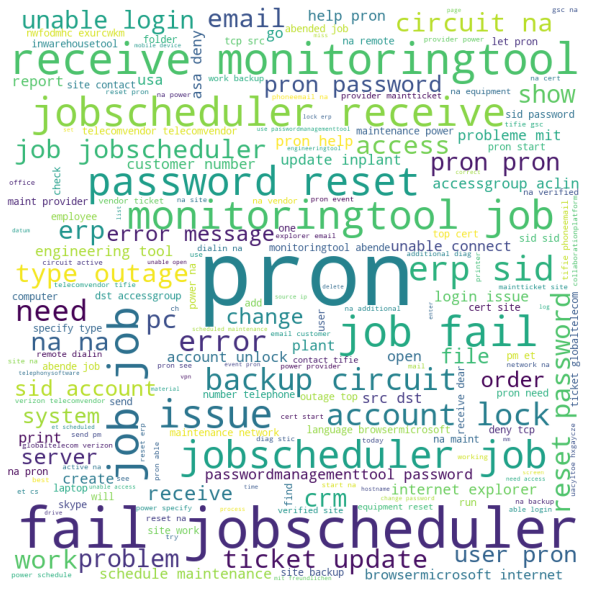

In [91]:
import matplotlib.pyplot as plt

wordcloud
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

**Implementing Models**

In [92]:
embedding_size= 60
window_size= 40
min_word= 5
down_sampling= 1e-2

In [93]:
from gensim.models.fasttext import FastText

**Words variable contains all the text of "English Description"**

In [94]:
Words

'login issue verify user detailsemployee manager name check the user name in ad reset the password advise the user to login check caller confirm that -pron- be able to login issue receive from com team -pron- meetingsskype meeting etc be t appear in -pron- calendar can somebody advise how to correct t s kind can not log in to vpn receive from com i can t log on to vpn best unable to access hrtool page unable to access hrtool page skype error skype error unable to log in to engineering tool skype unable to log in to engineering tool skype ticket employment status new nemployee enter user name ticket employment status new nemployee enter user name unable to disable add in on unable to disable add in on ticket update on inplant ticket update on inplant engineering tool say t connect unable to submit report engineering tool say t connect unable to submit report hrtool site t loading page correctly hrtool site t loading page correctly unable to login to hrtool to sgxqsuojr xwbesorf cards un

In [95]:
import nltk
from nltk import WordPunctTokenizer
word_punctuation_tokenizer = nltk.WordPunctTokenizer()
word_tokenized_corpus = [word_punctuation_tokenizer.tokenize(Words)]

In [96]:
word_tokenized_corpus

[['login',
  'issue',
  'verify',
  'user',
  'detailsemployee',
  'manager',
  'name',
  'check',
  'the',
  'user',
  'name',
  'in',
  'ad',
  'reset',
  'the',
  'password',
  'advise',
  'the',
  'user',
  'to',
  'login',
  'check',
  'caller',
  'confirm',
  'that',
  '-',
  'pron',
  '-',
  'be',
  'able',
  'to',
  'login',
  'issue',
  'receive',
  'from',
  'com',
  'team',
  '-',
  'pron',
  '-',
  'meetingsskype',
  'meeting',
  'etc',
  'be',
  't',
  'appear',
  'in',
  '-',
  'pron',
  '-',
  'calendar',
  'can',
  'somebody',
  'advise',
  'how',
  'to',
  'correct',
  't',
  's',
  'kind',
  'can',
  'not',
  'log',
  'in',
  'to',
  'vpn',
  'receive',
  'from',
  'com',
  'i',
  'can',
  't',
  'log',
  'on',
  'to',
  'vpn',
  'best',
  'unable',
  'to',
  'access',
  'hrtool',
  'page',
  'unable',
  'to',
  'access',
  'hrtool',
  'page',
  'skype',
  'error',
  'skype',
  'error',
  'unable',
  'to',
  'log',
  'in',
  'to',
  'engineering',
  'tool',
  'skype',

**FastText for Semantic Analysis**

In [97]:
%%time
ft_model = FastText(word_tokenized_corpus,
                     size=embedding_size,
                      window=window_size,
                      min_count=min_word,
                      sample=down_sampling,
                     sg=1,
                      iter=100)
 # sg means type of mode.sg=1 skip gram model

CPU times: user 1min 39s, sys: 250 ms, total: 1min 39s
Wall time: 1min 39s


In [98]:
print(ft_model.wv['login'])

[-0.00546668 -0.5031561   0.4928054   0.2722266  -0.07712205  0.6243691
  0.64228565 -0.35149497  0.28574678 -0.26468503 -0.65218395 -0.07043302
 -0.13555028 -0.2933959  -0.4797723   0.21092911  0.20047055 -0.09184294
  0.11532272  0.18652292 -0.3793087   0.48436445 -0.23501685 -0.39693806
 -0.02681398  0.43640268 -0.06196443 -0.45608562 -0.01813203  0.09336965
  0.08282723  0.6067392  -0.3212376  -0.10658295  0.3532241  -0.08432902
 -0.02474054 -0.17055412 -0.19570869  0.13555819  0.30617586  0.6764056
 -0.49621347  0.43166122 -0.08731227  0.08077986 -0.117975   -0.24747148
 -0.28884396 -0.5503499  -0.2653891  -0.314229   -0.30739412 -0.49722758
 -0.34541103 -0.25578976 -0.28094974  0.11523587  0.27727345  0.026131  ]


In [99]:
semantically_similar_words = {words: [item[0] for item in ft_model.wv.most_similar([words], topn=5)]
                  for words in ['account', 'login', 'password', 'reset', 'ticket', 'install']}

for k,v in semantically_similar_words.items():
    print(k+":"+str(v))

account:['lock', 'sid', 'accout', 'count', 'discount']
login:['to', 'logic', 'the', 'verified', 'verify']
password:['passwords', 'reset', 'to', 'login', 'the']
reset:['password', 'sid', 'erp', 'erpsid', 'passwords']
ticket:['inplant', 'maintticket', 'update', 'covalupdatecrosscomp', 'usplant']
install:['uninstalle', 'uninstalled', 'inst', 'reinstall', 'instead']


In [100]:
print(ft_model.wv.similarity(w1='login', w2='password'))

0.7108807


In [101]:
print(ft_model.wv.similarity(w1='login', w2='schedule'))

0.48586452


In [102]:
from sklearn.decomposition import PCA

all_similar_words = sum([[k] + v for k, v in semantically_similar_words.items()], [])

print(all_similar_words)
print(type(all_similar_words))
print(len(all_similar_words))

['account', 'lock', 'sid', 'accout', 'count', 'discount', 'login', 'to', 'logic', 'the', 'verified', 'verify', 'password', 'passwords', 'reset', 'to', 'login', 'the', 'reset', 'password', 'sid', 'erp', 'erpsid', 'passwords', 'ticket', 'inplant', 'maintticket', 'update', 'covalupdatecrosscomp', 'usplant', 'install', 'uninstalle', 'uninstalled', 'inst', 'reinstall', 'instead']
<class 'list'>
36


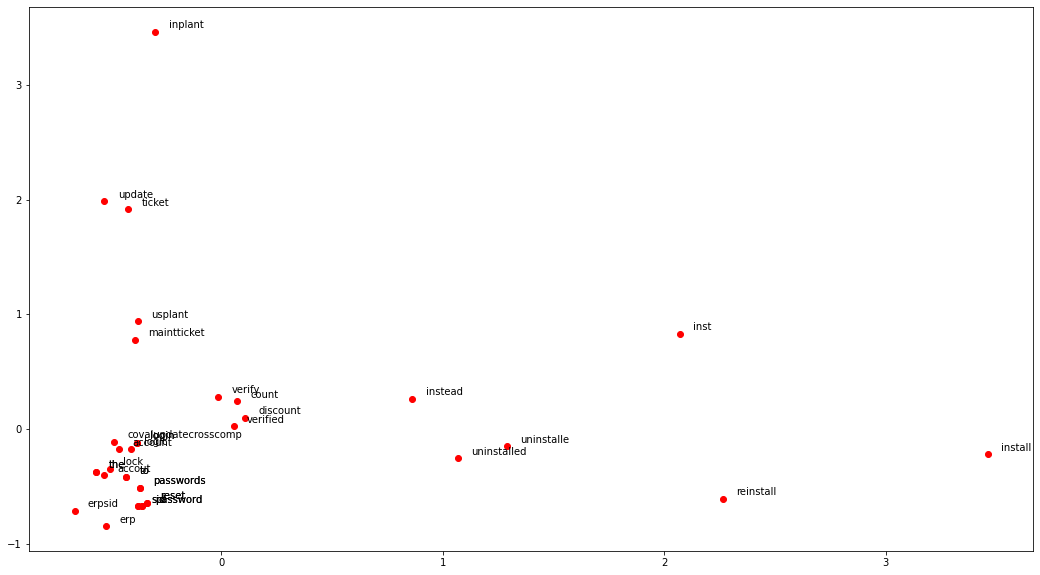

In [103]:
word_vectors = ft_model.wv[all_similar_words]

pca = PCA(n_components=2)

p_comps = pca.fit_transform(word_vectors)
word_names = all_similar_words

plt.figure(figsize=(18, 10))
plt.scatter(p_comps[:, 0], p_comps[:, 1], c='red')

for word_names, x, y in zip(word_names, p_comps[:, 0], p_comps[:, 1]):
    plt.annotate(word_names, xy=(x+0.06, y+0.03), xytext=(0, 0), textcoords='offset points')

**The words those have simillar meaning or related are neighbours and words those are not related or have opposite meaning, have more distance between them.**

**Generating Topics using LDA - Dimensionality Reduction Technique**

In [104]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(min_df = 4, max_features = 1000, ngram_range=(1,2))
cvec = cv.fit_transform(df_copyAnalysis['Combined Description'])

lda = LatentDirichletAllocation(n_components=10, learning_method = 'online', max_iter = 20 ,random_state=2)
X = lda.fit_transform(cvec)
print(X)


[[1.35746115e-03 9.86506592e-01 1.08874543e-06 1.21283262e-02
  1.08860936e-06 1.08859102e-06 1.08879539e-06 1.08856696e-06
  1.08872954e-06 1.08854441e-06]
 [2.31339087e-01 7.09320671e-02 8.82859797e-05 2.64762040e-03
  8.82710525e-05 8.82676430e-05 4.70889516e-01 8.82652627e-05
  2.23750356e-01 8.82634290e-05]
 [3.34226867e-01 2.25135553e-05 2.25122532e-05 2.25137937e-05
  2.25093411e-05 2.25089360e-05 2.25120998e-05 2.25083238e-05
  6.65593046e-01 2.25078589e-05]
 [9.52193741e-01 8.72099262e-05 8.71996897e-05 4.71086926e-02
  8.71901286e-05 8.71899232e-05 8.72070409e-05 8.71880069e-05
  8.71953911e-05 8.71862758e-05]
 [2.20274643e-01 1.40770469e-02 2.41113532e-02 2.35798244e-02
  1.02166810e-05 1.02163160e-05 6.95311886e-01 1.02160212e-05
  2.26043810e-02 1.02158018e-05]
 [9.96953832e-01 1.60528128e-05 1.60519216e-05 1.60533954e-05
  1.60501667e-05 1.60498878e-05 1.60521702e-05 1.60494762e-05
  2.91775917e-03 1.60491585e-05]
 [9.40297922e-01 6.71531906e-03 2.26080241e-02 1.87302751e

In [105]:
top_words = 10
topic_summaries = []

topic_word = lda.components_
vocab = cv.get_feature_names()

for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))
    print('Topic {}: {}'.format(i, ' | '.join(topic_words)))

Topic 0: be | the | pron | to | in | for | from | have | of | on
Topic 1: to | pron | the | be | password | erp | reset | com | from | in
Topic 2: na | job | at | in | jobscheduler | in jobscheduler | fail | jobscheduler at | fail in | site
Topic 3: pron | to | the | be | in | from | on | for | have | com
Topic 4: na | in | be | job | to | jobscheduler | from | at | jobscheduler at | on
Topic 5: pron | in | the | to | be | job | at | na | on | jobscheduler
Topic 6: pron | the | be | to | in | event | for | would | pron would | hostname
Topic 7: to | the | pron | be | in | for | from | on | password | erp
Topic 8: job | in | jobscheduler | in jobscheduler | at | fail | fail in | jobscheduler at | from | com
Topic 9: the | pron | to | be | in | of | for | com | from | pron would


1. Loading the clean data from file "**CleanedDatasetTranslated.csv**"
2. Vectorizing the corpus using **CountVectorizer** technique, as models cannot process words.
3. Checking **Top Words** in Groups like Top 10, Top 15
4. **Tokenizing** the corpus using nltk WordPunctTokenizer()
5. Using **FastText** for Semantic Analysis and found semantically similar words for account,login,password,reset,ticket and install.
6. Using **decomposition technique PCA** and plotting scatter plot to find words which are similar to each other.
7. Using **LDA** to generate Topics of similar or related words.

## PART 2 - <br> Model Building

---

* Building a model architecture which can classify. <br>
* Trying different model architectures by researching state of the art for similar tasks.  <br>
* Train the model  <br>
* To deal with large training time, save the weights so that you can use them when training the 
model for the second time without starting from scratch  <br>

**Traditional Machine Learning Model**

In [106]:
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier 
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier


from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

In [107]:
XX = df_copy['Combined Description']
tfidf_vect = TfidfVectorizer(min_df=5 ,use_idf=True,analyzer='word', token_pattern= r'\w{1,}', max_features=500)
X_vec = tfidf_vect.fit_transform(XX)


In [108]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_copy['Assignment group']= le.fit_transform(df_copy['Assignment group'])

y = df_copy['Assignment group']

In [109]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(X_vec,y,test_size=0.40,random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5044, 500), (3364, 500), (5044,), (3364,))

In [110]:
def fit_n_print(model, X_train, X_test, y_train, y_test):  # take the model, train data and test data as input

    model.fit(X_train, y_train)   
    pred_test = model.predict(X_test)     
    score = round(model.score(X_test, y_test), 3)   
  
    return pred_test

In [111]:
def cal_accuracy(model_name, y_test, y_pred): 

    print ("############  Model Used: ",model_name, " ####################")
    print("Confusion Matrix:\n ", 
        metrics.confusion_matrix(y_test, y_pred)) 
      
    accuracy=metrics.accuracy_score(y_test,y_pred)*100
    
    recallscore=metrics.recall_score(y_test, y_pred,average='micro')
    pscore=metrics.precision_score(y_test, y_pred,average='micro')
      
    print("Report : ", 
    metrics.classification_report(y_test, y_pred))
    return recallscore,accuracy,pscore

In [112]:
df_group=df_copy.groupby(['Assignment group']).size().reset_index(name='counts')

In [113]:
df_group.sort_values(by='counts',ascending=False)[:20]

Assignment group  counts
0                  0    3926
72                72     645
17                17     285
4                  4     257
73                73     252
12                12     241
11                11     215
23                23     200
56                56     183
5                  5     145
2                  2     140
45                45     128
6                  6     118
18                18     116
27                27     107
34                34     100
22                22      97
10                10      88
8                  8      85
25                25      69

In [114]:
lor = LogisticRegression()
sc1 = fit_n_print(lor, X_train, X_test, y_train, y_test)
rc1=cal_accuracy(lor,y_test,sc1)

nb  = MultinomialNB() 
sc2 = fit_n_print(nb, X_train, X_test, y_train, y_test)
rc2=cal_accuracy(nb,y_test,sc2)

rf  = RandomForestClassifier()   
sc3 = fit_n_print(rf, X_train, X_test, y_train, y_test)
rc3=cal_accuracy(rf,y_test,sc3)
   
svm = SVC(gamma = 'auto', kernel= 'poly', degree=1)  
sc4 = fit_n_print(svm, X_train, X_test, y_train, y_test)
rc4=cal_accuracy(svm,y_test,sc4)

xg = XGBClassifier()
sc5 = fit_n_print(xg, X_train, X_test, y_train, y_test)
rc5=cal_accuracy(xg,y_test,sc5)

############  Model Used:  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)  ####################
Confusion Matrix:
  [[1560    0    0 ...    3    0    0]
 [   1    0    0 ...    0    2    0]
 [  33    0   20 ...    0    9    0]
 ...
 [  17    0    0 ...    8    0    0]
 [   3    0    3 ...    0  224    0]
 [  28    0    0 ...    0   76    1]]
Report :                precision    recall  f1-score   support

           0       0.66      0.98      0.79      1595
           1       0.00      0.00      0.00         8
           2       0.83      0.30      0.44        67
           3       0.00      0.00      0.00         4
           4       0.45      0.47      0.46       105
           5       0.46      0.40      0.4

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############  Model Used:  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)  ####################
Confusion Matrix:
  [[1561    0    0 ...    0    0    0]
 [   1    0    0 ...    0    2    0]
 [  36    0   20 ...    0    7    1]
 ...
 [  21    0    0 ...    4    0    0]
 [   4    0    3 ...    0  208   10]
 [  28    0    0 ...    0   63   15]]
Report :                precision    recall  f1-score   support

           0       0.64      0.98      0.78      1595
           1       0.00      0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


############  Model Used:  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)  ####################
Confusion Matrix:
  [[1595    0    0 ...    0    0    0]
 [   8    0    0 ...    0    0    0]
 [  67    0    0 ...    0    0    0]
 ...
 [  25    0    0 ...    0    0    0]
 [ 246    0    0 ...    0    0    0]
 [ 109    0    0 ...    0    0    0]]
Report :                precision    recall  f1-score   support

           0       0.47      1.00      0.64      1595
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00        67
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00       105
           5       0.00      0.00      0.00        65
           6       0.00      0.00      0.00        45
          

In [115]:
print ("logistic regression",rc1[1])
print ("Multinomial NB",rc2[1])
print ("RandomForest",rc3[1])
print ("SVC",rc4[1])
print ("XGB classifier",rc5[1])


logistic regression 63.76337693222355
Multinomial NB 59.21521997621879
RandomForest 63.07966706302022
SVC 47.41379310344828
XGB classifier 64.23900118906064


**Hyperparameter Tune GridSearchCV**

In [116]:
#Logistic Regression 
from sklearn.model_selection import GridSearchCV

params = {"C":np.logspace(-3,3,7),"penalty":["l1","l2"] }
lor_cv = GridSearchCV(LogisticRegression(),param_grid=params, n_jobs=-1,cv=2, verbose=5)
lor_cv.fit(X_train,y_train)

Fitting 2 folds for each of 14 candidates, totalling 28 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    9.7s finished
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=2, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=5)

In [117]:
print(lor_cv.best_score_)
print(lor_cv.best_params_)

0.6316415543219667
{'C': 10.0, 'penalty': 'l2'}


In [118]:
lor_pred_cv = lor_cv.best_estimator_.predict(X_test)
sc6 = accuracy_score(y_test,lor_pred_cv)
print(sc6)

0.6530915576694412


In [119]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

ada = AdaBoostClassifier()

# define the grid of values to search
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]

# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# define the grid search procedure
grid_search = GridSearchCV(estimator=ada, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')

# execute the grid search
grid_result = grid_search.fit(X_train, y_train)

# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
	
	
ada_cv_pred = grid_result.best_estimator_.predict(X_test)
sc5a = accuracy_score(y_test,ada_cv_pred)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Best: 0.514799 using {'learning_rate': 0.01, 'n_estimators': 50}
0.510112 (0.006013) with: {'learning_rate': 0.0001, 'n_estimators': 10}
0.510112 (0.006013) with: {'learning_rate': 0.0001, 'n_estimators': 50}
0.510112 (0.006013) with: {'learning_rate': 0.0001, 'n_estimators': 100}
0.510112 (0.006013) with: {'learning_rate': 0.0001, 'n_estimators': 500}
0.510112 (0.006013) with: {'learning_rate': 0.001, 'n_estimators': 10}
0.510112 (0.006013) with: {'learning_rate': 0.001, 'n_estimators': 50}
0.511698 (0.006433) with: {'learning_rate': 0.001, 'n_estimators': 100}
0.501785 (0.023742) with: {'learning_rate': 0.001, 'n_estimators': 500}
0.511698 (0.006433) with: {'learning_rate': 0.01, 'n_estimators': 10}
0.514799 (0.021427) with: {'learning_rate': 0.01, 'n_estimators': 50}
0.471449 (0.018760) with: {'learning_rate': 0.01, 'n_estimators': 100}
0.502115 (0.014964) with: {'learning_rate': 0.01, 'n_estimators': 500}
0.504159 (0.023243) with: {'learning_rate': 0.1, 'n_estimators': 10}
0.497354

In [120]:
#Multinomial
params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, ],
         }

nb_cv = GridSearchCV(MultinomialNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
nb_cv.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  18 out of  25 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=5)

In [121]:
print(nb_cv.best_score_)
print(nb_cv.best_params_)

0.6185573882674973
{'alpha': 0.1}


In [122]:
nb_cv_pred = nb_cv.best_estimator_.predict(X_test)
sc7 = accuracy_score(y_test,nb_cv_pred)

In [123]:
#Random Forest Classifier
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

rf_cv = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
rf_cv.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [124]:
print(rf_cv.best_score_)
print(rf_cv.best_params_)

0.5467880346720781
{'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 200}


In [125]:
rf_cv_pred = rf_cv.best_estimator_.predict(X_test)
sc8 = accuracy_score(y_test,rf_cv_pred)

In [126]:
#SVM
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'poly', 'sigmoid']} 
            
svm_cv = GridSearchCV(estimator=svm, param_grid=param_grid, cv= 5)
svm_cv.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=1,
                           gamma='auto', kernel='poly', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [127]:
print(svm_cv.best_score_)
print(svm_cv.best_params_)

0.6429418959523023
{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [128]:
svm_cv_pred = svm_cv.best_estimator_.predict(X_test)
sc9 = accuracy_score(y_test,svm_cv_pred)


In [129]:
# XGBoost
from sklearn.model_selection import StratifiedKFold
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.05], #so called `eta` value
              'max_depth': [6],
              'min_child_weight': [11],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [5], #number of trees, change it to 1000 for better results
              'missing':[-999],
              'seed': [1337]}


xg_cv = GridSearchCV(xg,param_grid=parameters, n_jobs=5,
                   verbose=2, refit=True)
xg_cv.fit(X_train,y_train)


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:  1.9min remaining:  2.8min
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:  1.9min remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:  1.9min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='multi:softprob',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_...
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=5,
             param_grid={'colsample_bytree': [0.7], 'learning_rate': [0.05],
                         'max_depth': [6], 'min_child_weight': [11],
                         'missing': [-999], 'n_estimators': [5], '

In [130]:
print(xg_cv.best_score_)
print(xg_cv.best_params_)

0.5162578460521969
{'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 6, 'min_child_weight': 11, 'missing': -999, 'n_estimators': 5, 'nthread': 4, 'objective': 'binary:logistic', 'seed': 1337, 'silent': 1, 'subsample': 0.8}


In [131]:
xg_cv_pred = xg_cv.best_estimator_.predict(X_test)
sc10 = accuracy_score(y_test,xg_cv_pred)

In [132]:
pd.DataFrame([rc1[1],rc2[1],rc3[1],rc4[1],rc5[1],sc6,sc7,sc8,sc9,sc10,sc5a],
            index = ['LogisticRegression','MultinomialNB','RandomForestClassifier','SVC','XGBClassifier','Logistic GridsearchCV','Multinomial GridsearchCV','Random Forest GridsearchCV','SVM GridsearchCV','XGBoost GridsearchCV','adaboost']
, columns=['Accuracy'])

Accuracy
LogisticRegression          63.763377
MultinomialNB               59.215220
RandomForestClassifier      63.079667
SVC                         47.413793
XGBClassifier               64.239001
Logistic GridsearchCV        0.653092
Multinomial GridsearchCV     0.629905
Random Forest GridsearchCV   0.556778
SVM GridsearchCV             0.654578
XGBoost GridsearchCV         0.535672
adaboost                     0.537455

As data is class imbalanced ,so using Random sampler ,we are trying to balance.

In [133]:

!pip install imbalanced-learn

# check version number
import imblearn
print(imblearn.__version__)

0.4.3


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [134]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
rm=RandomOverSampler()
from imblearn.pipeline import make_pipeline
pipe=make_pipeline(rm)
x_r,y_r=pipe.fit_resample(X_vec,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [135]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(x_r,y_r,test_size=0.40,random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((174314, 500), (116210, 500), (174314,), (116210,))

In [136]:
df_group=df_copy.groupby(['Assignment group']).size().reset_index(name='counts')

In [137]:
df_group.sort_values(by='counts',ascending=False)[:20]

Assignment group  counts
0                  0    3926
72                72     645
17                17     285
4                  4     257
73                73     252
12                12     241
11                11     215
23                23     200
56                56     183
5                  5     145
2                  2     140
45                45     128
6                  6     118
18                18     116
27                27     107
34                34     100
22                22      97
10                10      88
8                  8      85
25                25      69

In [138]:

lor = LogisticRegression()
sc11 = fit_n_print(lor, X_train, X_test, y_train, y_test)
rc11=cal_accuracy(lor,y_test,sc11)



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


############  Model Used:  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)  ####################
Confusion Matrix:
  [[ 588    1    7 ...    0    0    7]
 [   0 1230    0 ...    0    0    0]
 [   0    0 1231 ...    0    0  241]
 ...
 [   0    0    0 ... 1583    0    0]
 [   0    8   12 ...    0  427  451]
 [   7    0    0 ...    0    0 1133]]
Report :                precision    recall  f1-score   support

           0       0.81      0.37      0.51      1591
           1       0.95      0.78      0.85      1581
           2       0.95      0.77      0.85      1600
           3       0.98      1.00      0.99      1620
           4       0.86      0.63      0.73      1585
           5       0.91      0.88      0.8

In [139]:


nb  = MultinomialNB() 
sc12 = fit_n_print(nb, X_train, X_test, y_train, y_test)
rc12=cal_accuracy(nb,y_test,sc12)

rf  = RandomForestClassifier()   
sc13 = fit_n_print(rf, X_train, X_test, y_train, y_test)
rc13=cal_accuracy(rf,y_test,sc13)  



############  Model Used:  MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)  ####################
Confusion Matrix:
  [[ 409    1    4 ...   14    0    0]
 [   0  615    0 ...    0    0    0]
 [   0    0  696 ...    0    0    0]
 ...
 [   0    0    0 ... 1583    0    0]
 [   0   17   12 ...    0  324    6]
 [  11    0    5 ...    0    0    8]]
Report :                precision    recall  f1-score   support

           0       0.52      0.26      0.34      1591
           1       0.83      0.39      0.53      1581
           2       0.91      0.43      0.59      1600
           3       0.89      0.97      0.93      1620
           4       0.70      0.36      0.48      1585
           5       0.67      0.71      0.69      1553
           6       0.68      0.69      0.69      1540
           7       0.83      0.98      0.90      1534
           8       0.83      0.88      0.85      1578
           9       0.79      0.98      0.88      1498
          10       0.66      0.83      

In [143]:
svm = SVC(gamma = 'auto', kernel= 'linear', degree=1)  
sc14 = fit_n_print(svm, X_train, X_test, y_train, y_test)
rc14=cal_accuracy(svm,y_test,sc14)





############  Model Used:  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)  ####################
Confusion Matrix:
  [[ 967    0    4 ...    0    0   13]
 [   0 1230    0 ...    0    0    0]
 [   0    0 1273 ...    0    0  233]
 ...
 [   0    0    0 ... 1583    0    0]
 [   6    8   12 ...    0  473  455]
 [   7    0    0 ...    0    0 1219]]
Report :                precision    recall  f1-score   support

           0       0.85      0.61      0.71      1591
           1       0.97      0.78      0.86      1581
           2       0.98      0.80      0.88      1600
           3       0.99      1.00      1.00      1620
           4       0.89      0.80      0.84      1585
           5       0.98      0.97      0.97      1553
           6       0.95      0.94      0.95      1540
        

In [144]:
xg = XGBClassifier()
sc15 = fit_n_print(xg, X_train, X_test, y_train, y_test)
rc15=cal_accuracy(xg,y_test,sc15)

############  Model Used:  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)  ####################
Confusion Matrix:
  [[ 838    0    7 ...    0    1    7]
 [   0 1230    0 ...    0    0    0]
 [   0    0 1265 ...    0    0    0]
 ...
 [   0    0    0 ... 1583    0    0]
 [   0    4   12 ...    0  522    2]
 [   0    0    0 ...    0    0  368]]
Report :                precision    recall  f1-score   support

           0       0.87      0.53      0.66      1591
           1       1.00      0.78      0.87      1581
           2       0.97      0.79      0.87      1600
       

In [145]:
pd.DataFrame([rc1[1],rc2[1],rc3[1],rc4[1],rc5[1],sc6,sc7,sc8,sc9,sc10,rc11[1],rc12[1],rc13[1],rc14[1],rc15[1],sc5a],
            index = ['LogisticRegression','MultinomialNB','RandomForestClassifier','SVC',
                     'XGBClassifier','Logistic GridsearchCV','Multinomial GridsearchCV','Random Forest GridsearchCV','SVM GridsearchCV',
                     'XGBoost GridsearchCV','Logistic Balanced data','Multinomial Balanced data','Random Forest Balanced data','SVM Balanced data',
                     'XGBoost Balanced data','Adaboost']
, columns=['Accuracy'])

Accuracy
LogisticRegression           63.763377
MultinomialNB                59.215220
RandomForestClassifier       63.079667
SVC                          47.413793
XGBClassifier                64.239001
Logistic GridsearchCV         0.653092
Multinomial GridsearchCV      0.629905
Random Forest GridsearchCV    0.556778
SVM GridsearchCV              0.654578
XGBoost GridsearchCV          0.535672
Logistic Balanced data       90.272782
Multinomial Balanced data    79.349454
Random Forest Balanced data  93.832717
SVM Balanced data            92.089321
XGBoost Balanced data        92.356080
Adaboost                      0.537455

In [ ]:
#LSTM

In [146]:
max_features = 40000
maxlen = 250
embedding_size = 200

In [147]:
tokenizer=Tokenizer(num_words=max_features)

In [148]:
tokenizer.fit_on_texts(df_copy['Combined Description'].values)
sequences = tokenizer.texts_to_sequences(df_copy['Combined Description'].values)

In [149]:
X=tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=maxlen)
# Target column to numpy array
y=np.array(y)
type(y)

numpy.ndarray

In [150]:
tokenizer.word_index

{'to': 1,
 'pron': 2,
 'be': 3,
 'the': 4,
 'in': 5,
 't': 6,
 'from': 7,
 'com': 8,
 'a': 9,
 'job': 10,
 'on': 11,
 'for': 12,
 'receive': 13,
 'i': 14,
 'at': 15,
 'password': 16,
 's': 17,
 'erp': 18,
 'have': 19,
 'na': 20,
 'jobscheduler': 21,
 'of': 22,
 'fail': 23,
 'user': 24,
 'reset': 25,
 'issue': 26,
 'unable': 27,
 'can': 28,
 'do': 29,
 'account': 30,
 'e': 31,
 'access': 32,
 'with': 33,
 'sid': 34,
 'ticket': 35,
 'error': 36,
 'email': 37,
 'need': 38,
 'monitoringtool': 39,
 'work': 40,
 'login': 41,
 'would': 42,
 'that': 43,
 'w': 44,
 'site': 45,
 'help': 46,
 'get': 47,
 'as': 48,
 'system': 49,
 'when': 50,
 'update': 51,
 'out': 52,
 'power': 53,
 'lock': 54,
 'use': 55,
 'circuit': 56,
 'name': 57,
 'change': 58,
 'an': 59,
 'hostname': 60,
 'but': 61,
 'see': 62,
 'network': 63,
 'or': 64,
 'et': 65,
 'event': 66,
 'if': 67,
 'connect': 68,
 'by': 69,
 'down': 70,
 'server': 71,
 'new': 72,
 'message': 73,
 'request': 74,
 'backup': 75,
 'able': 76,
 'what': 

**Set number of words**

In [151]:
num_words = len(tokenizer.word_index) + 1
print(num_words)

13607


**Create embedding matrix**

In [152]:
EMBEDDING_FILE = '/content/drive/MyDrive/Colab Notebooks/glove.6B.200d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd

# create a weight matrix for words in training docs
embedding_matrix = np.zeros((num_words, 200))

for word, i in tokenizer.word_index.items():
	embedding_vector = embeddings.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

**Model Defining**

In [153]:
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import LSTM,Embedding,Dense,TimeDistributed,Dropout,Bidirectional,Lambda,Flatten,Input,Add
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras import backend as K
vocab_size=num_words

In [154]:
model = Sequential()
model.add(Embedding(vocab_size,embedding_size,weights=[embedding_matrix],trainable=True,input_length=maxlen))
#model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(LSTM(100, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(74, activation='relu'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 250, 200)          2721400   
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               240800    
_________________________________________________________________
dense (Dense)                (None, 74)                14874     
Total params: 2,977,074
Trainable params: 2,977,074
Non-trainable params: 0
_________________________________________________________________


In [155]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 250, 200)          2721400   
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               240800    
_________________________________________________________________
dense (Dense)                (None, 74)                14874     
Total params: 2,977,074
Trainable params: 2,977,074
Non-trainable params: 0
_________________________________________________________________


In [156]:
Y = pd.get_dummies(df_copy['Assignment group']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (8408, 74)


In [157]:
X.shape

(8408, 250)

In [158]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.40, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(5044, 250) (5044, 74)
(3364, 250) (3364, 74)


In [159]:
history=model.fit(X_train, Y_train, epochs=10,batch_size=64,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=5, min_delta=0.0001)])

Epoch 1/10
71/71 [==============================] - 74s 962ms/step - loss: 5.2544 - accuracy: 0.4501 - val_loss: 4.0281 - val_accuracy: 0.4772
Epoch 2/10
71/71 [==============================] - 68s 961ms/step - loss: 4.1800 - accuracy: 0.4865 - val_loss: 3.7685 - val_accuracy: 0.5208
Epoch 3/10
71/71 [==============================] - 68s 951ms/step - loss: 3.9208 - accuracy: 0.5265 - val_loss: 3.7799 - val_accuracy: 0.5248
Epoch 4/10
71/71 [==============================] - 68s 956ms/step - loss: 3.7925 - accuracy: 0.5400 - val_loss: 3.7364 - val_accuracy: 0.5366
Epoch 5/10
71/71 [==============================] - 67s 943ms/step - loss: 3.8431 - accuracy: 0.5440 - val_loss: 3.9746 - val_accuracy: 0.5287
Epoch 6/10
71/71 [==============================] - 67s 939ms/step - loss: 3.9530 - accuracy: 0.5415 - val_loss: 3.7217 - val_accuracy: 0.5386
Epoch 7/10
71/71 [==============================] - 68s 951ms/step - loss: 3.7384 - accuracy: 0.5492 - val_loss: 3.6551 - val_accuracy: 0.5505

In [160]:
X.shape

(8408, 250)

Based on above models accuracy, after handling the class imbalance in data we are able to see a increase in accuracy for Random forest,XG boost and SVM.Out of these 3 ,Random forest classifier is giving an accuracy of 93%.so for further process we are taking random forest .

In [161]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(x_r,y_r,test_size=0.40,random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((174314, 500), (116210, 500), (174314,), (116210,))

In [162]:
rf  = RandomForestClassifier()   
sc17 = fit_n_print(rf, X_train, X_test, y_train, y_test)

In [163]:
import pickle
fame='finalmodel.sav'
pickle.dump(lor,open(fame,'wb'))
loaded_model=pickle.load(open(fame,'rb'))
result=loaded_model.score(X_train,y_train)

Approach 2 -Top 10 class data

---



**Merging Classes**

In [166]:
def merge_classes(df_copy):
    assign_group = df_copy.groupby(['Assignment group']).size().reset_index(name='count')
    df_copy_count25 = assign_group[assign_group['count']<25]
    for i in df_copy_count25['Assignment group']:
        df_copy['Assignment group'] = df_copy['Assignment group'].replace(i,'GRP_MISC')

In [167]:
merge_classes(df_copy)

**FastText Model Building and Finding Precison and Recall**

In [168]:
!pip install fasttext

     |████████████████████████████████| 71kB 3.2MB/s 
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3093650 sha256=25e8a96ddb1aa2bf43f29cf5a28f68dd00a686e8110fbbea1393e46c4f051ba1
  Stored in directory: /root/.cache/pip/wheels/98/ba/7f/b154944a1cf5a8cee91c154b75231136cc3a3321ab0e30f592
Successfully built fasttext


In [169]:
!wget https://github.com/facebookresearch/fastText/archive/v0.1.0.zip

--2021-07-03 09:59:14--  https://github.com/facebookresearch/fastText/archive/v0.1.0.zip
Resolving github.com (github.com)... 52.192.72.89
Connecting to github.com (github.com)|52.192.72.89|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/facebookresearch/fastText/zip/v0.1.0 [following]
--2021-07-03 09:59:15--  https://codeload.github.com/facebookresearch/fastText/zip/v0.1.0
Resolving codeload.github.com (codeload.github.com)... 13.112.159.149
Connecting to codeload.github.com (codeload.github.com)|13.112.159.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘v0.1.0.zip’

v0.1.0.zip              [ <=>                ]  92.06K  --.-KB/s    in 0.07s   

2021-07-03 09:59:15 (1.27 MB/s) - ‘v0.1.0.zip’ saved [94267]



In [170]:
!unzip v0.1.0.zip

Archive:  v0.1.0.zip
431c9e2a9b5149369cc60fb9f5beba58dcf8ca17
   creating: fastText-0.1.0/
  inflating: fastText-0.1.0/.gitignore  
  inflating: fastText-0.1.0/CONTRIBUTING.md  
  inflating: fastText-0.1.0/LICENSE  
  inflating: fastText-0.1.0/Makefile  
  inflating: fastText-0.1.0/PATENTS  
  inflating: fastText-0.1.0/README.md  
  inflating: fastText-0.1.0/classification-example.sh  
  inflating: fastText-0.1.0/classification-results.sh  
  inflating: fastText-0.1.0/eval.py  
  inflating: fastText-0.1.0/get-wikimedia.sh  
  inflating: fastText-0.1.0/pretrained-vectors.md  
  inflating: fastText-0.1.0/quantization-example.sh  
  inflating: fastText-0.1.0/quantization-results.sh  
   creating: fastText-0.1.0/src/
  inflating: fastText-0.1.0/src/args.cc  
  inflating: fastText-0.1.0/src/args.h  
  inflating: fastText-0.1.0/src/dictionary.cc  
  inflating: fastText-0.1.0/src/dictionary.h  
  inflating: fastText-0.1.0/src/fasttext.cc  
  inflating: fastText-0.1.0/src/fasttext.h  
  inflat

In [171]:
%cd fastText-0.1.0
!make

/content/fastText-0.1.0
c++ -pthread -std=c++0x -O3 -funroll-loops -c src/args.cc
c++ -pthread -std=c++0x -O3 -funroll-loops -c src/dictionary.cc
c++ -pthread -std=c++0x -O3 -funroll-loops -c src/productquantizer.cc
c++ -pthread -std=c++0x -O3 -funroll-loops -c src/matrix.cc
c++ -pthread -std=c++0x -O3 -funroll-loops -c src/qmatrix.cc
c++ -pthread -std=c++0x -O3 -funroll-loops -c src/vector.cc
c++ -pthread -std=c++0x -O3 -funroll-loops -c src/model.cc
c++ -pthread -std=c++0x -O3 -funroll-loops -c src/utils.cc
c++ -pthread -std=c++0x -O3 -funroll-loops -c src/fasttext.cc
c++ -pthread -std=c++0x -O3 -funroll-loops args.o dictionary.o productquantizer.o matrix.o qmatrix.o vector.o model.o utils.o fasttext.o src/main.cc -o fasttext


In [172]:
!./fasttext

usage: fasttext <command> <args>

The commands supported by fasttext are:

  supervised              train a supervised classifier
  quantize                quantize a model to reduce the memory usage
  test                    evaluate a supervised classifier
  predict                 predict most likely labels
  predict-prob            predict most likely labels with probabilities
  skipgram                train a skipgram model
  cbow                    train a cbow model
  print-word-vectors      print word vectors given a trained model
  print-sentence-vectors  print sentence vectors given a trained model
  nn                      query for nearest neighbors
  analogies               query for analogies



In [173]:
df_copy_Refined_Data.shape

(8408, 10)

In [174]:
from io import StringIO
import csv

col = ['Assignment group', 'Combined Description']
df_copy_FastText=df_copy_Refined_Data[col]
df_copy_FastText['Assignment group']=['__label__'+ s for s in df_copy_Refined_Data['Assignment group']]

df_copy_FastText.to_csv(r'/content/drive/MyDrive/Colab Notebooks/AutomaticTicketSystem_updated.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [175]:
!head -n 7000 "/content/drive/MyDrive/Colab Notebooks/AutomaticTicketSystem_updated.txt" > "/content/drive/MyDrive/Colab Notebooks/AutomaticTicketSystem_updated_train.txt"
!tail -n 1408  "/content/drive/MyDrive/Colab Notebooks/AutomaticTicketSystem_updated.txt" > "/content/drive/MyDrive/Colab Notebooks/AutomaticTicketSystem_updated_test.txt"

In [176]:
%%time
!./fasttext supervised -input "/content/drive/MyDrive/Colab Notebooks/AutomaticTicketSystem_updated.txt" -output model_Automatic_Ticket_System

Read 0M words
Number of words:  13612
Number of labels: 74
Progress: 100.0%  words/sec/thread: 993761  lr: 0.000000  loss: 2.088182  eta: 0h0m 
CPU times: user 21.6 ms, sys: 29 ms, total: 50.6 ms
Wall time: 1.28 s


In [177]:
!ls

args.o				   model.o
classification-example.sh	   PATENTS
classification-results.sh	   pretrained-vectors.md
CONTRIBUTING.md			   productquantizer.o
dictionary.o			   qmatrix.o
eval.py				   quantization-example.sh
fasttext			   quantization-results.sh
fasttext.o			   README.md
get-wikimedia.sh		   src
LICENSE				   tutorials
Makefile			   utils.o
matrix.o			   vector.o
model_Automatic_Ticket_System.bin  wikifil.pl
model_Automatic_Ticket_System.vec  word-vector-example.sh


In [178]:
# model_Automatic_Ticket_System.bin 
!./fasttext test model_Automatic_Ticket_System.bin "/content/drive/MyDrive/Colab Notebooks/AutomaticTicketSystem_updated_test.txt"

N	1408
P@1	0.578
R@1	0.578
Number of examples: 1408


In [179]:
!ls

args.o				   model.o
classification-example.sh	   PATENTS
classification-results.sh	   pretrained-vectors.md
CONTRIBUTING.md			   productquantizer.o
dictionary.o			   qmatrix.o
eval.py				   quantization-example.sh
fasttext			   quantization-results.sh
fasttext.o			   README.md
get-wikimedia.sh		   src
LICENSE				   tutorials
Makefile			   utils.o
matrix.o			   vector.o
model_Automatic_Ticket_System.bin  wikifil.pl
model_Automatic_Ticket_System.vec  word-vector-example.sh


**Re Running model on Top 10 groups**

In [180]:
top_10_grp= list(df_copy_Refined_Data.groupby('Assignment group').size().\
                 reset_index().\
                 sort_values(by=0,ascending=False)[:10]['Assignment group'])
            
top_10_grp

['GRP_0',
 'GRP_8',
 'GRP_24',
 'GRP_12',
 'GRP_9',
 'GRP_2',
 'GRP_19',
 'GRP_3',
 'GRP_6',
 'GRP_13']

In [181]:
df_top_10=df_copy_Refined_Data[df_copy_Refined_Data['Assignment group'].isin(top_10_grp)]
df_top_10

Short description  ... language
0                                           login issue  ...       en
1                                               outlook  ...       en
2                                    cant log in to vpn  ...       en
3                         unable to access hr_tool page  ...       it
4                                          skype error   ...       no
...                                                 ...  ...      ...
8489                                     account locked  ...       en
8492                 hr_tool etime option not visitble   ...       fr
8494  tablet needs reimaged due to multiple issues w...  ...       en
8496                           telephony_software issue  ...       en
8497  vip2: windows password reset for tifpdchb pedx...  ...       en

[6349 rows x 10 columns]

In [182]:
# shuffle the dataframe
df_top_10=df_top_10.sample(frac=1)
df_top_10

Short description  ... language
3157  i am not able to upload engineering_tool, see ...  ...       en
1998  power outage: engineering_toolkuznetsk warehou...  ...       en
2206  network outage:poncacity -schlumhdyhter-dmvpn ...  ...       en
5008                              skype is not working   ...       af
4892              erp SID_34 account password is locked  ...       en
...                                                 ...  ...      ...
4865                          erp SID_34 password reset  ...       af
5098                    simfghon wants to use the mail.  ...       en
1025                                        login issue  ...       en
504   all my calls to my ip phone are going to wareh...  ...       en
4634                           unable to connect to vpn  ...       es

[6349 rows x 10 columns]

**Executing FastText on top 10 groups**

In [183]:
col = ['Assignment group', 'Combined Description']
df_copy_FastText_Top10Groups=df_top_10[col]
df_copy_FastText_Top10Groups['Assignment group']=['__label__'+ s for s in df_top_10['Assignment group']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [184]:
df_copy_FastText_Top10Groups.shape

(6349, 2)

In [185]:
 df_copy_FastText_Top10Groups.to_csv(r'/content/drive/MyDrive/Colab Notebooks/AutomaticTicketSystem_updatedTop10Groups.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")

**Splitting Train and Test Data for Top 10 Groups**

In [186]:
!head -n 5349 "/content/drive/MyDrive/Colab Notebooks/AutomaticTicketSystem_updatedTop10Groups.txt" > "/content/drive/MyDrive/Colab Notebooks/AutomaticTicketSystem_updated_Top10Groups_train.txt"
!tail -n 1000  "/content/drive/MyDrive/Colab Notebooks/AutomaticTicketSystem_updatedTop10Groups.txt" > "/content/drive/MyDrive/Colab Notebooks/AutomaticTicketSystem_updated_Top10Groups_test.txt"


**Splitting Train and Test Data for Top 10 Groups**

In [187]:
%%time
!./fasttext supervised -input "/content/drive/MyDrive/Colab Notebooks/AutomaticTicketSystem_updated_Top10Groups_train.txt" -output model_Automatic_Ticket_System_Top10Groups

Read 0M words
Number of words:  8769
Number of labels: 10
Progress: 100.0%  words/sec/thread: 2433313  lr: 0.000000  loss: 0.912223  eta: 0h0m 
CPU times: user 23.2 ms, sys: 35 ms, total: 58.2 ms
Wall time: 675 ms


**Testing the model**

In [188]:
!ls

args.o
classification-example.sh
classification-results.sh
CONTRIBUTING.md
dictionary.o
eval.py
fasttext
fasttext.o
get-wikimedia.sh
LICENSE
Makefile
matrix.o
model_Automatic_Ticket_System.bin
model_Automatic_Ticket_System_Top10Groups.bin
model_Automatic_Ticket_System_Top10Groups.vec
model_Automatic_Ticket_System.vec
model.o
PATENTS
pretrained-vectors.md
productquantizer.o
qmatrix.o
quantization-example.sh
quantization-results.sh
README.md
src
tutorials
utils.o
vector.o
wikifil.pl
word-vector-example.sh


In [189]:
# model_Automatic_Ticket_System_Top10Groups.bin
!./fasttext test model_Automatic_Ticket_System_Top10Groups.bin "/content/drive/MyDrive/Colab Notebooks/AutomaticTicketSystem_updated_Top10Groups_test.txt"

N	1000
P@1	0.742
R@1	0.742
Number of examples: 1000


**Precision and Recall has improved and reached to 75 % with top 10 groups.**


*   Next we will work on epochs and lerning rate
*   List item


In [190]:
%%time
!./fasttext supervised -input "/content/drive/MyDrive/Colab Notebooks/AutomaticTicketSystem_updated_Top10Groups_train.txt" -output model_Automatic_Ticket_System_Top10Groups -lr 1.0 -epoch 50

Read 0M words
Number of words:  8769
Number of labels: 10
Progress: 100.0%  words/sec/thread: 2447531  lr: 0.000000  loss: 0.224167  eta: 0h0m 
CPU times: user 73.6 ms, sys: 39 ms, total: 113 ms
Wall time: 1.52 s


In [191]:
# model_Automatic_Ticket_System_Top10Groups.bin
!./fasttext test model_Automatic_Ticket_System_Top10Groups.bin "/content/drive/MyDrive/Colab Notebooks/AutomaticTicketSystem_updated_Top10Groups_test.txt"

N	1000
P@1	0.799
R@1	0.799
Number of examples: 1000


**With Epoch-50 and lr=1.0,Precision and recall increases to 80%**

In [192]:
%%time
!./fasttext supervised -input "/content/drive/MyDrive/Colab Notebooks/AutomaticTicketSystem_updated_Top10Groups_train.txt" -output model_Automatic_Ticket_System_Top10Groups -lr 0.5 -epoch 25 -wordNgrams 2 -bucket 200000 -dim 50 -loss one-vs-all

Unknown loss: one-vs-all

The following arguments are mandatory:
  -input              training file path
  -output             output file path

The following arguments are optional:
  -verbose            verbosity level [2]

The following arguments for the dictionary are optional:
  -minCount           minimal number of word occurences [1]
  -minCountLabel      minimal number of label occurences [0]
  -wordNgrams         max length of word ngram [2]
  -bucket             number of buckets [200000]
  -minn               min length of char ngram [0]
  -maxn               max length of char ngram [0]
  -t                  sampling threshold [0.0001]
  -label              labels prefix [__label__]

The following arguments for training are optional:
  -lr                 learning rate [0.5]
  -lrUpdateRate       change the rate of updates for the learning rate [100]
  -dim                size of word vectors [50]
  -ws                 size of the context window [5]
  -epoch              n

In [193]:
# model_Automatic_Ticket_System_Top10Groups.bin
!./fasttext test model_Automatic_Ticket_System_Top10Groups.bin "/content/drive/MyDrive/Colab Notebooks/AutomaticTicketSystem_updated_Top10Groups_test.txt"

N	1000
P@1	0.799
R@1	0.799
Number of examples: 1000


**Top 10 Groups**

In [194]:
tokenizer.fit_on_texts(df_top_10['Combined Description'].values)
sequences = tokenizer.texts_to_sequences(df_top_10['Combined Description'].values)

In [196]:
X=tf.keras.preprocessing.sequence.pad_sequences(
sequences, maxlen=maxlen)
# Target column to numpy array
y=np.array(y)
type(y)

numpy.ndarray

In [197]:
tokenizer.word_index

{'to': 1,
 'pron': 2,
 'be': 3,
 'the': 4,
 'in': 5,
 't': 6,
 'from': 7,
 'com': 8,
 'job': 9,
 'on': 10,
 'a': 11,
 'receive': 12,
 'for': 13,
 'at': 14,
 'i': 15,
 'password': 16,
 'na': 17,
 'erp': 18,
 's': 19,
 'jobscheduler': 20,
 'have': 21,
 'of': 22,
 'fail': 23,
 'user': 24,
 'reset': 25,
 'unable': 26,
 'issue': 27,
 'account': 28,
 'can': 29,
 'e': 30,
 'do': 31,
 'sid': 32,
 'access': 33,
 'ticket': 34,
 'with': 35,
 'error': 36,
 'monitoringtool': 37,
 'email': 38,
 'need': 39,
 'login': 40,
 'work': 41,
 'site': 42,
 'would': 43,
 'w': 44,
 'get': 45,
 'update': 46,
 'help': 47,
 'lock': 48,
 'that': 49,
 'power': 50,
 'system': 51,
 'out': 52,
 'when': 53,
 'circuit': 54,
 'as': 55,
 'name': 56,
 'network': 57,
 'change': 58,
 'use': 59,
 'connect': 60,
 'an': 61,
 'et': 62,
 'event': 63,
 'hostname': 64,
 'or': 65,
 'backup': 66,
 'but': 67,
 'see': 68,
 'down': 69,
 'vpn': 70,
 'if': 71,
 'skype': 72,
 'request': 73,
 'what': 74,
 'by': 75,
 'able': 76,
 'new': 77,
 

In [199]:
num_words = len(tokenizer.word_index) + 1
print(num_words)

13607


In [200]:
EMBEDDING_FILE = '/content/drive/MyDrive/Colab Notebooks/glove.6B.200d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd

# create a weight matrix for words in training docs
embedding_matrix = np.zeros((num_words, 200))

for word, i in tokenizer.word_index.items():
	embedding_vector = embeddings.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

In [201]:
vocab_size=num_words

In [202]:
top_ten_model = Sequential()
top_ten_model.add(Embedding(vocab_size,embedding_size,weights=[embedding_matrix],trainable=True,input_length=maxlen))
#model.add(SpatialDropout1D(0.2))
top_ten_model.add(Bidirectional(LSTM(100, dropout=0.2, recurrent_dropout=0.2)))
top_ten_model.add(Dense(10, activation='softmax'))
top_ten_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
top_ten_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 250, 200)          2721400   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200)               240800    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2010      
Total params: 2,964,210
Trainable params: 2,964,210
Non-trainable params: 0
_________________________________________________________________


In [203]:
top_ten_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
#model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])
top_ten_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 250, 200)          2721400   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200)               240800    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2010      
Total params: 2,964,210
Trainable params: 2,964,210
Non-trainable params: 0
_________________________________________________________________


In [204]:
Y = pd.get_dummies(df_top_10['Assignment group']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (6349, 10)


In [205]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(5714, 250) (5714, 10)
(635, 250) (635, 10)


In [206]:
top_ten_history=top_ten_model.fit(X_train, Y_train, epochs=10,batch_size=64,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=5, min_delta=0.0001)])


Epoch 1/10
81/81 [==============================] - 82s 954ms/step - loss: 1.1315 - accuracy: 0.6947 - val_loss: 0.8271 - val_accuracy: 0.7517
Epoch 2/10
81/81 [==============================] - 76s 943ms/step - loss: 0.7752 - accuracy: 0.7641 - val_loss: 0.7572 - val_accuracy: 0.7378
Epoch 3/10
81/81 [==============================] - 76s 942ms/step - loss: 0.6464 - accuracy: 0.7904 - val_loss: 0.6539 - val_accuracy: 0.8042
Epoch 4/10
81/81 [==============================] - 76s 943ms/step - loss: 0.5226 - accuracy: 0.8236 - val_loss: 0.6311 - val_accuracy: 0.7675
Epoch 5/10
81/81 [==============================] - 76s 942ms/step - loss: 0.4381 - accuracy: 0.8503 - val_loss: 0.7418 - val_accuracy: 0.7605
Epoch 6/10
81/81 [==============================] - 77s 949ms/step - loss: 0.4174 - accuracy: 0.8672 - val_loss: 0.5765 - val_accuracy: 0.8199
Epoch 7/10
81/81 [==============================] - 80s 992ms/step - loss: 0.3219 - accuracy: 0.8856 - val_loss: 0.6082 - val_accuracy: 0.8059

**Accuracy:80 %**

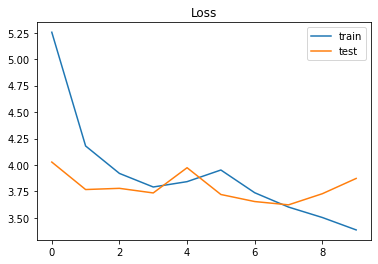

In [207]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

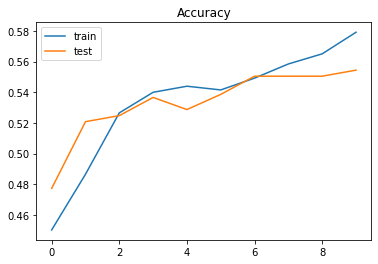

In [208]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

**Classifcation Report**

In [209]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1)
Y_true_classes = np.argmax(Y_test, axis = 1)

In [210]:
Y_pred_classes[:5], Y_true_classes[:5]

(array([0, 0, 0, 0, 0]), array([0, 5, 0, 0, 0]))

In [211]:
model.save(project_path + 'ticketing_assignment_model.h5')

# returns a compiled model
# identical to the previous one
model = load_model(project_path + 'ticketing_assignment_model.h5')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 250, 200)          2721400   
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               240800    
_________________________________________________________________
dense (Dense)                (None, 74)                14874     
Total params: 2,977,074
Trainable params: 2,977,074
Non-trainable params: 0
_________________________________________________________________


In [213]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(15)]
print(classification_report(Y_true_classes, Y_pred_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.65      0.94      0.77       401
     Class 1       0.00      0.00      0.00        23
     Class 2       0.00      0.00      0.00        16
     Class 3       0.00      0.00      0.00        22
     Class 4       0.00      0.00      0.00        17
     Class 5       0.00      0.00      0.00        30
     Class 6       0.00      0.00      0.00        26
     Class 7       0.00      0.00      0.00        16
     Class 8       0.00      0.00      0.00        61
     Class 9       0.00      0.00      0.00        23
    Class 10       0.00      0.00      0.00         0
    Class 11       0.00      0.00      0.00         0
    Class 12       0.00      0.00      0.00         0
    Class 13       0.00      0.00      0.00         0
    Class 14       0.00      0.00      0.00         0

    accuracy                           0.59       635
   macro avg       0.04      0.06      0.05       635
weighted avg       0.41   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
